#CRNY Data Visualization Competition

 The project aims to create a data visualization dashboard consisting of basic, interactive and animated plots using python-based libraries. This is a notebook which documents all the visualization created as a part of the CRNY Data Visualization competition.

## Libraries & Packages

Installing the necessary libraries not present in the Google Collab for plotting.

In [1]:
!pip install plotly
!pip install streamlit
!pip install mne_connectivity
!pip install mycolorpy
!pip install plotly-geo==1.0.0
!pip install geopandas==0.8.1
!pip install pyshp==2.1.2
!pip install shapely==1.8.5
!pip install dash
!pip install upsetplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
  Preparing metadata (setup.py) ... don

Importing necessary libraries used further in the code.

In [2]:
# Helper libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import base64
from io import BytesIO
import IPython
from bs4 import BeautifulSoup
from google.colab import drive
from urllib.request import urlopen
from dash import Dash, dcc, html, Input, Output, callback
import json

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import altair as alt
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import plotly.offline as pyo
from mne_connectivity.viz import plot_connectivity_circle
from mycolorpy import colorlist as mcp
from dash import Dash, dcc, html, Input, Output
from plotly.subplots import make_subplots
from matplotlib import cm
from upsetplot import UpSet

In [3]:
drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/Colab_Notebooks/CRNY

Mounted at /content/gdrive/
/content/gdrive/MyDrive/Colab_Notebooks/CRNY


In [4]:
crny_raw_df = pd.read_csv("crny_raw.csv")
crny_raw_df.head()

<ipython-input-4-d9e63841dec2>:1: DtypeWarning:

Columns (11,12,13,20,27,28,35,52,53,54,77,81,108,116,124,137,149,159,160,161,175,176) have mixed types. Specify dtype option on import or set low_memory=False.



id       g14_city  g15_zipcode                      g16_county  \
0  N3R8BXQE4K        BUFFALO      14201.0                  Erie County      
1  E555HATF05            NaN          NaN                             NaN   
2  0LTH6QJQH8  New York City      10040.0  New York County (Manhattan)      
3  R3S4V21D40      Manhattan      10031.0  New York County (Manhattan)      
4  BZEFVJAYBT       Brooklyn      11238.0       Kings County (Brooklyn)     

         g17_region g18_community          g20_raceethnicity1  \
0  Western New York       Urban    Asian or Pacific Islander    
1               NaN           NaN                         NaN   
2     New York City       Urban                       White     
3     New York City       Urban    Black or African American    
4     New York City       Urban    Asian or Pacific Islander    

         g20_raceethnicity2 g20_raceethnicity3 g20_raceethnicity4  ...  \
0                   White                  NaN                NaN  ...   
1                       NaN                NaN                NaN  ...   
2                       NaN                NaN                NaN  ...   
3                       NaN                NaN                NaN  ...   
4   Arab or Middle Eastern                 NaN                NaN  ...   

  p_agerange   p_status p41_gender1 p41_gender2 p41_gender3 p41_gender4  \
0        NaN        NaN         NaN         NaN         NaN         NaN   
1      25-34  Withdrawn  gender_oth   twospirit       woman         NaN   
2        NaN        NaN         NaN         NaN         NaN         NaN   
3        NaN        NaN         NaN         NaN         NaN         NaN   
4        NaN        NaN         NaN         NaN         NaN         NaN   

  p41_gender5 p46_caregiving1 p46_caregiving2 p46_caregiving3  
0         NaN             NaN             NaN             NaN  
1         NaN   no_caregiving             NaN             NaN  
2         NaN             NaN             NaN             NaN  
3         NaN             NaN             NaN             NaN  
4         NaN             NaN             NaN             NaN  

[5 rows x 180 columns]

## Preprocessing

In [6]:
list(crny_raw_df.columns)

['id',
 'g14_city',
 'g15_zipcode',
 'g16_county',
 'g17_region',
 'g18_community',
 'g20_raceethnicity1',
 'g20_raceethnicity2',
 'g20_raceethnicity3',
 'g20_raceethnicity4',
 'g20_raceethnicity5',
 'g20_raceethnicity6',
 'g20_raceethnicity7',
 'g20_raceethnicity8',
 'g21_immigrant',
 'g22_language',
 'g23_gender1',
 'g23_gender2',
 'g23_gender3',
 'g23_gender4',
 'g23_gender5',
 'g24_transgender',
 'g25_lgbtqiap',
 'g26_deafdisabled',
 'g27_providecare1',
 'g27_providecare2',
 'g27_providecare3',
 'g27_providecare4',
 'g27_providecare5',
 'g28_criminallegalsystem',
 'g28b_criminal_findemploy',
 'g29_financialsafetynet1',
 'g29_financialsafetynet2',
 'g29_financialsafetynet3',
 'g29_financialsafetynet4',
 'g29_financialsafetynet5',
 'g30_discipline1',
 'g30_discipline2',
 'g30_discipline3',
 'g31_approach1',
 'g31_approach2',
 'g31_approach3',
 'g31_approach4',
 'g31_approach5',
 'g31_approach6',
 'g32_enrolled',
 'g32b_enrolled_name1',
 'g32b_enrolled_name2',
 'g32b_enrolled_name3',


Combining certain columns from the two forms and removing unnecessary column which will not be used for creating visualizations. Also, combining multiple columns present that represent the same feature.

In [7]:
new_column_names = {
    'g14_city': 'city',
    'g15_zipcode': 'zipcode',
    'g16_county' : 'county',
    'g17_region' : 'region',
    'g18_community' : 'community',
    'g21_immigrant': 'immigrant',
    'g22_language' : 'primary_language',
    'g24_transgender' : 'transgender',
    'g25_lgbtqiap' : 'lgbtqiap',
    'g26_deafdisabled': 'deaf_disabled',
    'g28_criminallegalsystem': 'criminal_legal_system',
    'g28b_criminal_findemploy': 'criminal_find_employ',
    'g32_enrolled' : 'enrolled',
    'p_status': 'status',
    'g_agerange' : 'age_18',
    'p_age' : 'age',
    'p_agerange ' : 'age_range',
    'g_enrollmentstatus' : 'enrollment_status',
    'p3_impacts' : 'impacts',
    'p4_barriers' : 'barriers',
    'p5_amountofenergy' : 'amount_of_energy',
    'p6_amountoftime' : 'amount_of_time',
    'p7_financialcapacity' : 'financial_capacity',
    'p8_financialstability' : 'financial_stability',
    'p9_2021hhincome' : 'household_income_2021',
    'p11_otherincome' : 'other_income',
    'p12_healthinsurance' : 'health_insurance',
    'p13_400emergency' : 'finance_400_emergency',
    'p14_carryingdebt' : 'debt',
    'p14b_debtmanageable' : 'debt_status',
    'p15_physicalhealth' : 'good_physical_health',
    'p16_mentalhealth' : 'good_mental_health',
    'p17_stablehousing' : 'stable_housing',
    'p18_feedmyself' : 'feed_myself',
    'p19_socialrelationships' : 'supporting_social_relationships',
    'p20_purposefullife' : 'purposeful_life',
    'p21_agency' : 'agency_future',
    'p22_optimistic' : 'optimistic_future',
    'p23_publicvalueswork' : 'public_value',
    'p24_articulating' : 'confident_articulating',
    'p25_deservesafetynet' : 'deserve_financial_safety_net',
    'p26_awareofgi' : 'aware_of_gi',
    'p28_policygroup' : 'policy_group',
    'p29_emergencyassist' : 'emergency_financial_assist_2020_2022'
}

unwanted_columns = ['p33_zipcode',
                    'p34_county',
                    'p35_region',
                    'p36_community',
                    'p_agerange',

                    'p38_race1' ,
                    'p38_race2',
                    'p38_race3',
                    'p38_race3',
                    'p38_race4',
                    'p38_race5',
                    'p38_race6',
                    'p38_race7',
                    'p38_race8',

                    'g20_raceethnicity1',
                    'g20_raceethnicity2',
                    'g20_raceethnicity3',
                    'g20_raceethnicity4',
                    'g20_raceethnicity5',
                    'g20_raceethnicity6',
                    'g20_raceethnicity7',
                    'g20_raceethnicity8',

                    'p39_immigrant',
                    'p40_language',

                    'p41_gender1',
                    'p41_gender2',
                    'p41_gender3',
                    'p41_gender4',
                    'p41_gender5',

                    'g23_gender1',
                    'g23_gender2',
                    'g23_gender3',
                    'g23_gender4',
                    'g23_gender5',

                    'p42_transgender',
                    'p43_lgbtqiap',
                    'p44_deafdisabled',

                    'p46_caregiving1',
                    'p46_caregiving2',
                    'p46_caregiving3',

                    'g27_providecare1',
                    'g27_providecare2',
                    'g27_providecare3',
                    'g27_providecare4',
                    'g27_providecare5',

                    'p45_criminallegal',
                    'p45b_criminalemploy',

                    'g29_financialsafetynet1',
                    'g29_financialsafetynet2',
                    'g29_financialsafetynet3',
                    'g29_financialsafetynet4',
                    'g29_financialsafetynet5',

                    'p1_discipline1',
                    'p1_discipline2',
                    'p1_discipline3',
                    'g30_discipline1',
                    'g30_discipline2',
                    'g30_discipline3',

                    'p2_approachtopractice1',
                    'p2_approachtopractice2',
                    'p2_approachtopractice3',
                    'p2_approachtopractice4',
                    'p2_approachtopractice5',
                    'p2_approachtopractice6',

                    'g31_approach1',
                    'g31_approach2',
                    'g31_approach3',
                    'g31_approach4',
                    'g31_approach5',
                    'g31_approach6',

                    'g32b_enrolled_name1',
                    'g32b_enrolled_name2',
                    'g32b_enrolled_name3',
                    'g32b_enrolled_name4',
                    'g32b_enrolled_name5',
                    'g32b_enrolled_name6',
                    'g32b_enrolled_name7',
                    'g32b_enrolled_name8',
                    'g32b_enrolled_name9',

                    'p10_earnmoney1',
                    'p10_earnmoney2',
                    'p10_earnmoney3',
                    'p10_earnmoney4',
                    'p10_earnmoney5',

                    'p10b_wagespaid1',
                    'p10b_wagespaid2',
                    'p10b_wagespaid3',
                    'p10b_wagespaid4',

                    'p27_causes1',
                    'p27_causes2',
                    'p27_causes3',
                    'p27_causes4',
                    'p27_causes5',
                    'p27_causes6',
                    'p27_causes7',
                    'p27_causes8',
                    'p27_causes9',
                    'p27_causes10',

                    'p29b_typesofassistance1',
                    'p29b_typesofassistance2',
                    'p29b_typesofassistance3',
                    'p29b_typesofassistance4',
                    'p29b_typesofassistance5',
                    'p29b_typesofassistance6',

                    'p30_employimpact1',
                    'p30_employimpact2',
                    'p30_employimpact3',
                    'p30_employimpact4',
                    'p30_employimpact5',
                    'p30_employimpact6',
                    'p30_employimpact7',
                    'p30_employimpact8',

                    'p31_artpracticeimpact1',
                    'p31_artpracticeimpact2',
                    'p31_artpracticeimpact3',
                    'p31_artpracticeimpact4',
                    'p31_artpracticeimpact5',
                    'p31_artpracticeimpact6',
                    'p31_artpracticeimpact7',
                    'p31_artpracticeimpact8',
                    'p31_artpracticeimpact9',
                    'p31_artpracticeimpact10',
                    'p31_artpracticeimpact11',
                    'p31_artpracticeimpact12',
                    'p31_artpracticeimpact13',

                    'p32_wellbeingimpact1',
                    'p32_wellbeingimpact2',
                    'p32_wellbeingimpact3',
                    'p32_wellbeingimpact4',
                    'p32_wellbeingimpact5',
                    'p32_wellbeingimpact6',
                    'p32_wellbeingimpact7',
                    'p32_wellbeingimpact8',
                    'p32_wellbeingimpact9',
                    'p32_wellbeingimpact10',
                    'p32_wellbeingimpact11',
                    'p32_wellbeingimpact12']

crny_df = crny_raw_df
crny_df.rename(columns=new_column_names, inplace=True)

crny_df['ethnicity'] = crny_df.apply(lambda row: [row['g20_raceethnicity1'], row['g20_raceethnicity2'], row['g20_raceethnicity3'], row['g20_raceethnicity4'], row['g20_raceethnicity5'], row['g20_raceethnicity6'], row['g20_raceethnicity7'], row['g20_raceethnicity8']], axis=1)
crny_df['gender'] = crny_df.apply(lambda row: [row['g23_gender1'], row['g23_gender2'], row['g23_gender3'], row['g23_gender4'], row['g23_gender5']], axis=1)
crny_df['providecare_yes'] = crny_df.apply(lambda row: [row['g27_providecare1'], row['g27_providecare2'], row['g27_providecare3']], axis=1)
crny_df['financial_safety'] = crny_df.apply(lambda row: [row['g29_financialsafetynet1'], row['g29_financialsafetynet2'], row['g29_financialsafetynet3'], row['g29_financialsafetynet4'], row['g29_financialsafetynet5']], axis=1)
crny_df['discipline'] = crny_df.apply(lambda row: [row['g30_discipline1'], row['g30_discipline2'], row['g30_discipline3']], axis=1)
crny_df['approach'] = crny_df.apply(lambda row: [row['g31_approach1'], row['g31_approach2'], row['g31_approach3'], row['g31_approach4'], row['g31_approach5'], row['g31_approach6']], axis=1)
crny_df['enrolled_name'] = crny_df.apply(lambda row: [row['g32b_enrolled_name1'], row['g32b_enrolled_name2'], row['g32b_enrolled_name3'], row['g32b_enrolled_name4'], row['g32b_enrolled_name5'], row['g32b_enrolled_name6'], row['g32b_enrolled_name7'], row['g32b_enrolled_name8'], row['g32b_enrolled_name9']], axis=1)
crny_df['earning_mode'] = crny_df.apply(lambda row: [row['p10_earnmoney1'], row['p10_earnmoney2'], row['p10_earnmoney3'], row['p10_earnmoney4'], row['p10_earnmoney5']], axis=1)
crny_df['wage_payment_mode'] = crny_df.apply(lambda row: [row['p10b_wagespaid1'], row['p10b_wagespaid2'], row['p10b_wagespaid3'], row['p10b_wagespaid4']], axis=1)
crny_df['causes_participation'] = crny_df.apply(lambda row: [row['p27_causes1'], row['p27_causes2'], row['p27_causes3'], row['p27_causes4'], row['p27_causes5'], row['p27_causes6'], row['p27_causes7'], row['p27_causes8'], row['p27_causes9'], row['p27_causes10']], axis=1)
crny_df['emergency_assistance_type'] = crny_df.apply(lambda row: [row['p29b_typesofassistance1'], row['p29b_typesofassistance2'], row['p29b_typesofassistance3'], row['p29b_typesofassistance4'], row['p29b_typesofassistance5'], row['p29b_typesofassistance6']], axis=1)
crny_df['employment_impact_2020_2022'] = crny_df.apply(lambda row: [row['p30_employimpact1'], row['p30_employimpact2'], row['p30_employimpact3'], row['p30_employimpact4'], row['p30_employimpact5'], row['p30_employimpact6'], row['p30_employimpact7'], row['p30_employimpact8']], axis=1)
crny_df['practice_impact_2020_2022'] = crny_df.apply(lambda row: [row['p31_artpracticeimpact1'], row['p31_artpracticeimpact2'], row['p31_artpracticeimpact3'], row['p31_artpracticeimpact4'], row['p31_artpracticeimpact5'], row['p31_artpracticeimpact6'], row['p31_artpracticeimpact7'], row['p31_artpracticeimpact8'], row['p31_artpracticeimpact9'], row['p31_artpracticeimpact10'], row['p31_artpracticeimpact11'], row['p31_artpracticeimpact12'], row['p31_artpracticeimpact13']], axis=1)
crny_df['wellbeing_impact_2020_2022'] = crny_df.apply(lambda row: [row['p32_wellbeingimpact1'], row['p32_wellbeingimpact2'], row['p32_wellbeingimpact3'], row['p32_wellbeingimpact4'], row['p32_wellbeingimpact5'], row['p32_wellbeingimpact6'], row['p32_wellbeingimpact7'], row['p32_wellbeingimpact8'], row['p32_wellbeingimpact9'], row['p32_wellbeingimpact10'], row['p32_wellbeingimpact11'], row['p32_wellbeingimpact12']], axis=1)

crny_df.drop(unwanted_columns, axis=1, inplace=True)

In [12]:
crny_df.isnull().sum()

id                                          0
city                                     1877
zipcode                                  1876
county                                   1876
region                                   1876
community                                1876
immigrant                                1876
primary_language                         1876
transgender                              1876
lgbtqiap                                 1876
deaf_disabled                            1876
criminal_legal_system                    1876
criminal_find_employ                     1876
enrolled                                 1876
age_18                                   1876
enrollment_status                       21396
impacts                                 10970
barriers                                10695
amount_of_energy                        10861
amount_of_time                          10887
financial_capacity                      10875
financial_stability               

Checking for missing values in the data.

Checking certain columns for unique values.

In [13]:
for column in crny_df.columns:
  if isinstance(crny_df[column].iloc[0], list) != True:
    unique_counts = crny_df[column].value_counts()
    print(f"Column: {column}")
    print(unique_counts)
    print()

Column: id
N3R8BXQE4K    1
Z787IMOB3N    1
MD0L4V9XSS    1
CGY457A5JC    1
3UP007IMVG    1
             ..
5YEE5JAP86    1
STWPJHAQMF    1
KKZQD7IYEU    1
RPD15Q21PR    1
Z9I2V387IN    1
Name: id, Length: 23797, dtype: int64

Column: city
Brooklyn             6609
New York             4373
Bronx                1031
Brooklyn              845
New York              409
                     ... 
Lowman                  1
SOUTH FARMINGDALE       1
Fort Covington          1
New Yokr                1
Oaklland Gardens        1
Name: city, Length: 1490, dtype: int64

Column: zipcode
11221.0    931
11385.0    578
11216.0    568
11237.0    560
11206.0    545
          ... 
10560.0      1
10924.0      1
14847.0      1
12077.0      1
12790.0      1
Name: zipcode, Length: 1062, dtype: int64

Column: county
Kings County (Brooklyn)           8014
New York County (Manhattan)       5305
Queens County                     2763
Bronx County                      1362
Monroe County                      389
 

In [ ]:
crny_df.to_csv("crny_processed.csv",index=False)

## Overview Page Chart

In [8]:
status_df = crny_df[['status']].dropna()
status_df = status_df.groupby('status').size().reset_index(name='frequency')
total_frequency = status_df['frequency'].sum()
status_df['percentage'] = (status_df['frequency'] / total_frequency) * 100
status_df['formatted_percentage'] = status_df['percentage'].apply(lambda x: f'{round(x, 2)}%')
status_df.to_csv("status.csv",index=False)

## County Map

Preprocessing of the data and creating visualization for map.

In [ ]:
fips_df = pd.read_csv("fips.csv")

crny_df['county_trimmed'] = (crny_df['county'].str.replace(r'\([^()]*\)', '', regex=True)).str.strip()

county_df = crny_df.merge(fips_df[fips_df['State Code (FIPS)'] == 36], how='left', left_on='county_trimmed', right_on='Area Name (including legal/statistical area description)')
county_df = county_df.rename(columns={'County Code (FIPS)': 'county_fips'})
county_df = county_df.dropna(subset=['county_fips'])
county_df['county_fips'] = county_df['county_fips'].astype('Int64')
custom_order = ['Tribal', 'Rural', 'Suburban','Urban']
county_df.sort_values(by='community', key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))
county_status_df = county_df.groupby(['county_fips', 'county','community']).size().reset_index(name='Number of Artists')
county_status_df['fips'] = ['3600'+num.replace(".0","") if len(num.replace(".0","")) == 1 else ('360'+num.replace(".0","") if len(num.replace(".0","")) == 2 else '36'+num.replace(".0","")) for num in county_status_df['county_fips'].astype(str).tolist()]
county_status_df.rename(columns={'community':'Community'})


county_fips                  county   Community  Number of Artists   fips
0              1        Albany County        Rural                   10  36001
1              1        Albany County     Suburban                   32  36001
2              1        Albany County        Urban                  107  36001
3              3      Allegany County        Rural                   17  36003
4              3      Allegany County        Urban                    2  36003
..           ...                     ...         ...                ...    ...
164          119  Westchester County         Rural                   18  36119
165          119  Westchester County      Suburban                  215  36119
166          119  Westchester County         Urban                  146  36119
167          121       Wyoming County        Rural                    5  36121
168          123         Yates County        Rural                    4  36123

[169 rows x 5 columns]

In [ ]:
county_status_df.to_csv("counties.csv",index=False)

In [ ]:
county_status_df

county_fips                  county   community  Number of Artists   fips
0              1        Albany County        Rural                   10  36001
1              1        Albany County     Suburban                   32  36001
2              1        Albany County        Urban                  107  36001
3              3      Allegany County        Rural                   17  36003
4              3      Allegany County        Urban                    2  36003
..           ...                     ...         ...                ...    ...
164          119  Westchester County         Rural                   18  36119
165          119  Westchester County      Suburban                  215  36119
166          119  Westchester County         Urban                  146  36119
167          121       Wyoming County        Rural                    5  36121
168          123         Yates County        Rural                    4  36123

[169 rows x 5 columns]

In [ ]:
community_df = county_df.groupby('community').size().reset_index(name='Number of Artists')
community_df.to_csv("communities.csv",index=False)

In [ ]:
#county_df.groupby(['county_fips', 'county','community','city','region']).size().reset_index(name='count')
custom_order = ['Tribal', 'Rural', 'Suburban','Urban']

county_df.sort_values(by='community', key=lambda x: x.map({v: i for i, v in enumerate(custom_order)}))

id              city  zipcode                          county  \
0      N3R8BXQE4K           BUFFALO  14201.0                  Erie County      
2      0LTH6QJQH8     New York City  10040.0  New York County (Manhattan)      
3      R3S4V21D40         Manhattan  10031.0  New York County (Manhattan)      
4      BZEFVJAYBT          Brooklyn  11238.0       Kings County (Brooklyn)     
5      4HF20W8D84          New York  11237.0       Kings County (Brooklyn)     
...           ...               ...      ...                             ...   
23786  T2L67W0132          New York  10034.0  New York County (Manhattan)      
23787  XFH2ZTUFVB  Oaklland Gardens  11364.0                Queens County      
23788  ZRHE2YHWAJ             Bronx  10457.0                 Bronx County      
23789  2FDTOSCAXH          Brooklyn  11207.0       Kings County (Brooklyn)     
23790  GW843FFWXQ          New York  10033.0  New York County (Manhattan)      

                 region community immigrant primary_language transgender  \
0      Western New York   Urban        No          English         Yes     
2         New York City   Urban        No          English          No     
3         New York City   Urban        No          English          No     
4         New York City   Urban        No          English          No     
5         New York City   Urban        No          English          No     
...                 ...       ...       ...              ...         ...   
23786     New York City   Urban       Yes          Spanish          No     
23787     New York City   Urban       Yes          Spanish          No     
23788     New York City   Urban        No          Spanish          No     
23789     New York City   Urban       Yes          Spanish          No     
23790     New York City   Urban       Yes          Spanish          No     

                       lgbtqiap  ...  \
0                         Yes    ...   
2                         Yes    ...   
3                         Yes    ...   
4      I prefer not to answer    ...   
5                          No    ...   
...                         ...  ...   
23786                      No    ...   
23787                      No    ...   
23788                      No    ...   
23789                      No    ...   
23790                      No    ...   

                               practice_impact_2020_2022  \
0      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
2      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
3      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
4      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
5      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
...                                                  ...   
23786  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
23787  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
23788  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
23789  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   
23790  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...   

                              wellbeing_impact_2020_2022   county_trimmed  \
0      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...      Erie County   
2      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  New York County   
3      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  New York County   
4      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...     Kings County   
5      [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...     Kings County   
...                                                  ...              ...   
23786  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  New York County   
23787  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    Queens County   
23788  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...     Bronx County   
23789  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...     Kings County   
23790  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  New York County   

      Summary 

In [ ]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

fig = px.choropleth(
    county_status_df,
    geojson=counties,
    locations='fips',
    color='count',
    scope='usa',
    color_continuous_scale="Agsunset",
    range_color=[min(county_status_df['count']), max(county_status_df['count'])],
    title='Distribution of Artists by County',
    labels={'color': 'Population'},
    hover_name='county',
    hover_data={'fips': False, 'county': False, 'count': True},
    height=600,
    width=1000,
    animation_frame='community'
)
fig.update_layout(title_text="Status of Grants by County", title_x=0.5, title_font_size=24)
fig.update_geos(fitbounds="locations")
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [None, {"frame": {"duration": 3000, "redraw": True}, "mode": "immediate", "transition": {"duration": 2000}}],
                    "label": "Play",
                    "method": "animate",
                },
                {
                    "args": [[None], {"frame": {"duration": 3000, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                    "label": "Pause",
                    "method": "animate",
                }
            ],
            "direction": "left",
            "pad": {"r": 10, "t": 40},
            "showactive": False,
            "type": "buttons",
            "x": 0.2,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top",
        }
    ],
    sliders=[
        {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 16},
                "prefix": "Status: ",
                "visible": True,
                "xanchor": "right"
            },
            #"transition": {"duration": 3000},  # Adjust the animation duration here (in milliseconds)
            "pad": {"b": 10, "t": 50},
            "len": 1,
            "x": 0,
            "y": 0,
            "steps": []
        }
    ]
)

fig.show()
#fig.write_html("animated_choropleth.html", auto_play=False)

KeyError: 'count'

## Ethnicity Polar Chart

Preprocessing of the data and creating visualization for polar chart.

In [ ]:
exploded_df = crny_df.explode('ethnicity')
exploded_df['ethnicity'] = exploded_df['ethnicity'].str.replace(r'\(please describe\)|\[|\d+|\.|,', '', regex=True).str.strip()
ethnicity_df = exploded_df[['ethnicity','immigrant']].dropna()
ethnicity_df = ethnicity_df.groupby(['ethnicity', 'immigrant']).size().reset_index(name='frequency')
total_frequency = ethnicity_df.groupby('ethnicity')['frequency'].transform('sum')
ethnicity_df['percentage'] = (ethnicity_df['frequency'] / total_frequency) * 100
ethnicity_df

In [ ]:
ethnicity_df.to_csv("ethnicity_chart.csv",index=False)

In [ ]:
ethnicity_list = ethnicity_df["ethnicity"].unique()

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H2(
            f"Polar Charts of Ethnicities and Immigration Status of Artists",
            style={"textAlign": "center"},
        ),
        html.Div("Choose the radius scale:"),
        dcc.RadioItems(
            id="bar-polar-app-x-radio-items",
            options=["Absolute", "Logarithmic"],
            value="Logarithmic",
        ),
        html.Br(),
        html.Div("Choose States:"),
        dcc.Dropdown(
            id="bar-polar-app-x-dropdown",
            value=ethnicity_list[:3],
            options=ethnicity_list,
            multi=True,
        ),
        dcc.Graph(id="bar-polar-app-x-graph"),
    ],
    style={"margin": "1em 5em", "fontSize": 18},
)


@app.callback(
    Output("bar-polar-app-x-graph", "figure"),
    Input("bar-polar-app-x-dropdown", "value"),
    Input("bar-polar-app-x-radio-items", "value"),
)
def update_graph(ethnicity, radius_scale):
    filtered_df = ethnicity_df[ethnicity_df["ethnicity"].isin(ethnicity)]
    log_r = True if radius_scale == "Logarithmic" else False

    fig = px.bar_polar(
        filtered_df,
        r=filtered_df["frequency"],
        theta=filtered_df["ethnicity"],
        color=filtered_df["immigrant"],
        template="plotly_white",
        color_discrete_sequence=["#bd2e95","#a37cf0","#682bd7"],
        log_r=log_r,
        hover_name='ethnicity',
        hover_data={'ethnicity' : False, 'immigrant': True, 'frequency': True, 'percentage': True}
    )
    return fig


if __name__ == "__main__":
    app.run_server(debug=True)

## Survey Chord Diagram

Preprocessing of the data and creating visualization for chord diagram.

In [16]:
wellbeing_df = crny_df[['wellbeing_impact_2020_2022',"financial_capacity", "financial_stability", "good_mental_health", "feed_myself", "stable_housing"]]
wellbeing_df["wellbeing_impact_2020_2022"] = wellbeing_df["wellbeing_impact_2020_2022"].apply(lambda x: [item for item in x if pd.notna(item)] + ["overall"])
wellbeing_df = wellbeing_df.explode('wellbeing_impact_2020_2022')
custom_values = {'overall': 'Overall Impact',
                 'accumulateddebt': 'Accumulated Debt',
                 'becamecaregiver': 'Became Caregiver',
                 'anxiety': 'Anxiety',
                 'foodinsecurity': 'Food Insecurity',
                 'housinginsecurity': 'Housing Insecurity',
                 'loneliness': 'Loneliness',
                 'gotsick': 'Sickness',
                 'hadtomove': 'Forced to Move',
                 'mentalhealthimprove': 'Mental Health Improvement',
                 'physicalhealthimprove': 'Physical Health Improvement',
                 'selfcareimprove': 'Self-Care Improvement',
                 'wellbeing_noimpact': 'No Impact',
                 'wellbeingimpact_oth': 'Other',}
wellbeing_df['wellbeing_impact_2020_2022'] = wellbeing_df['wellbeing_impact_2020_2022'].replace(custom_values)

<ipython-input-16-2495eb5270f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
wellbeing_df['wellbeing_impact_2020_2022'] == wellbeing_df.wellbeing_impact_2020_2022.unique()[-1]

0        False
1        False
1        False
1        False
1        False
         ...  
23796    False
23796    False
23796    False
23796    False
23796    False
Name: wellbeing_impact_2020_2022, Length: 76090, dtype: bool

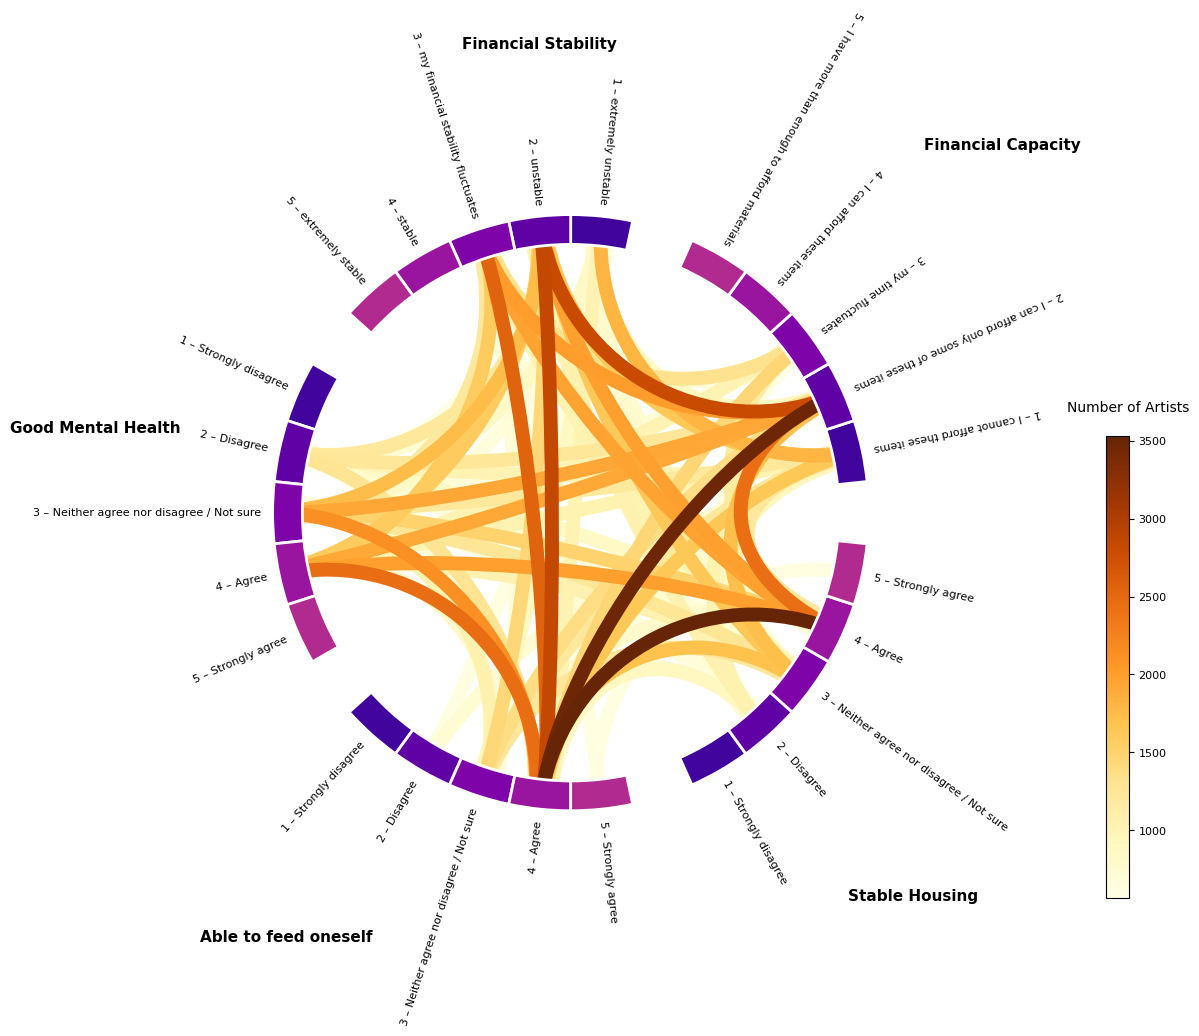

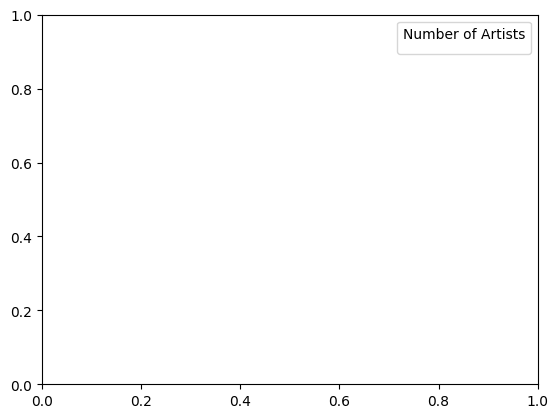

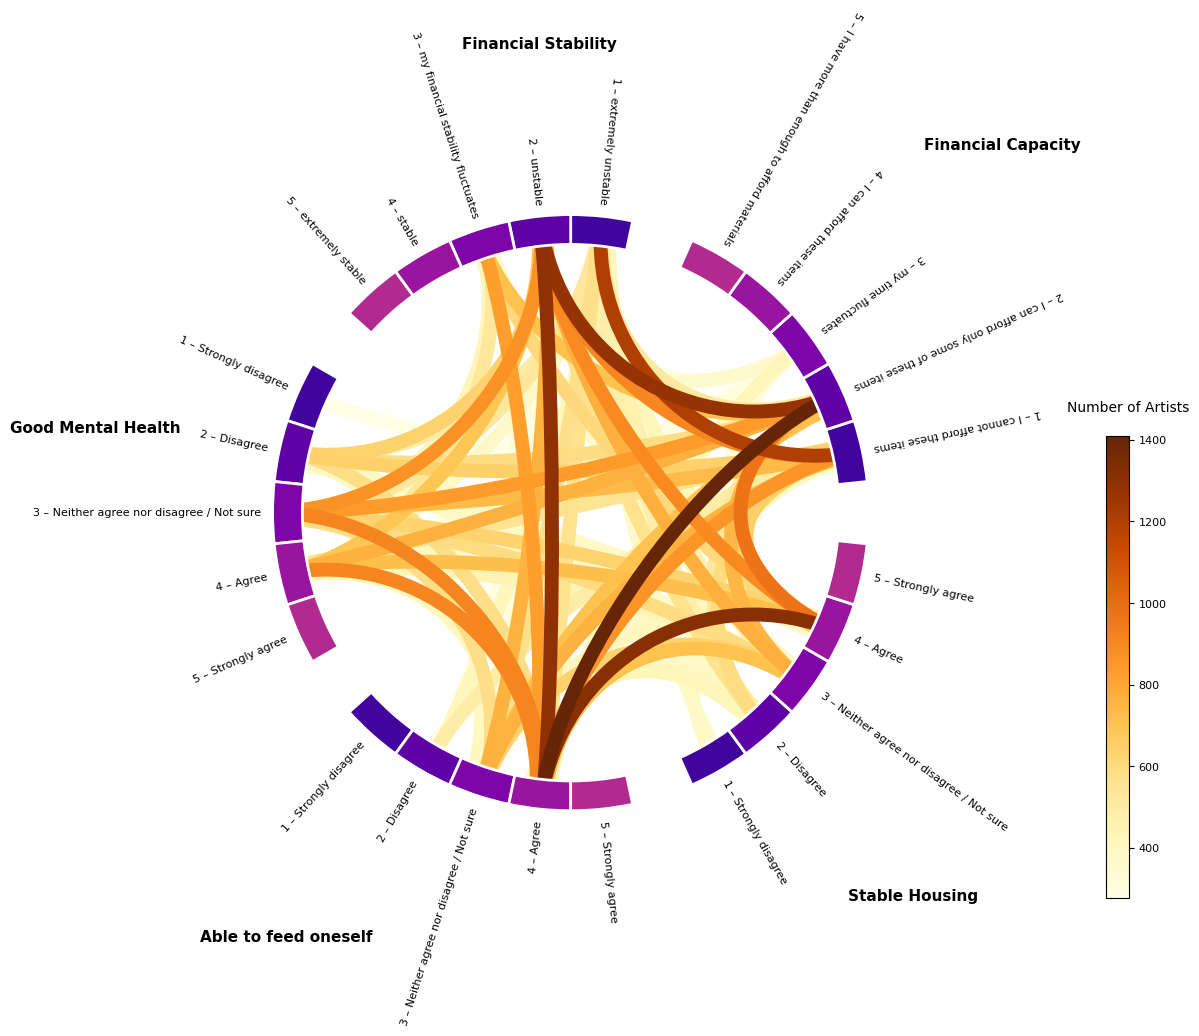

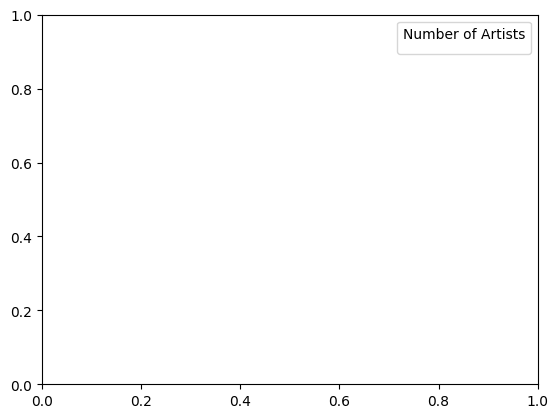

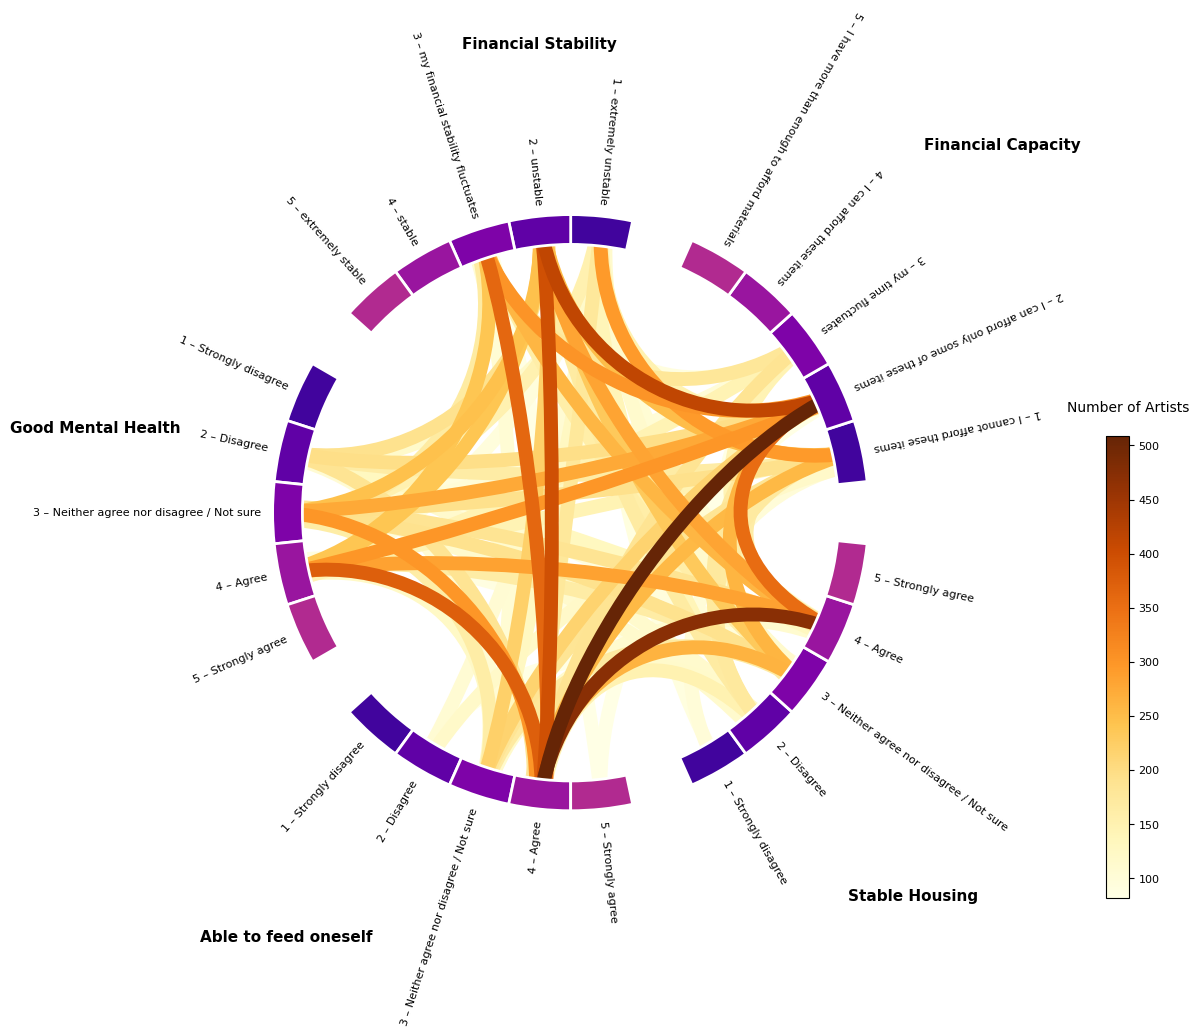

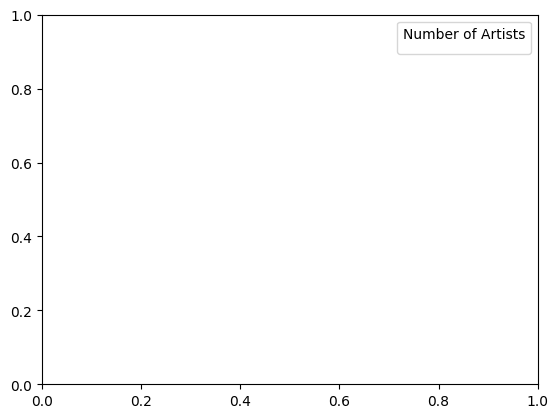

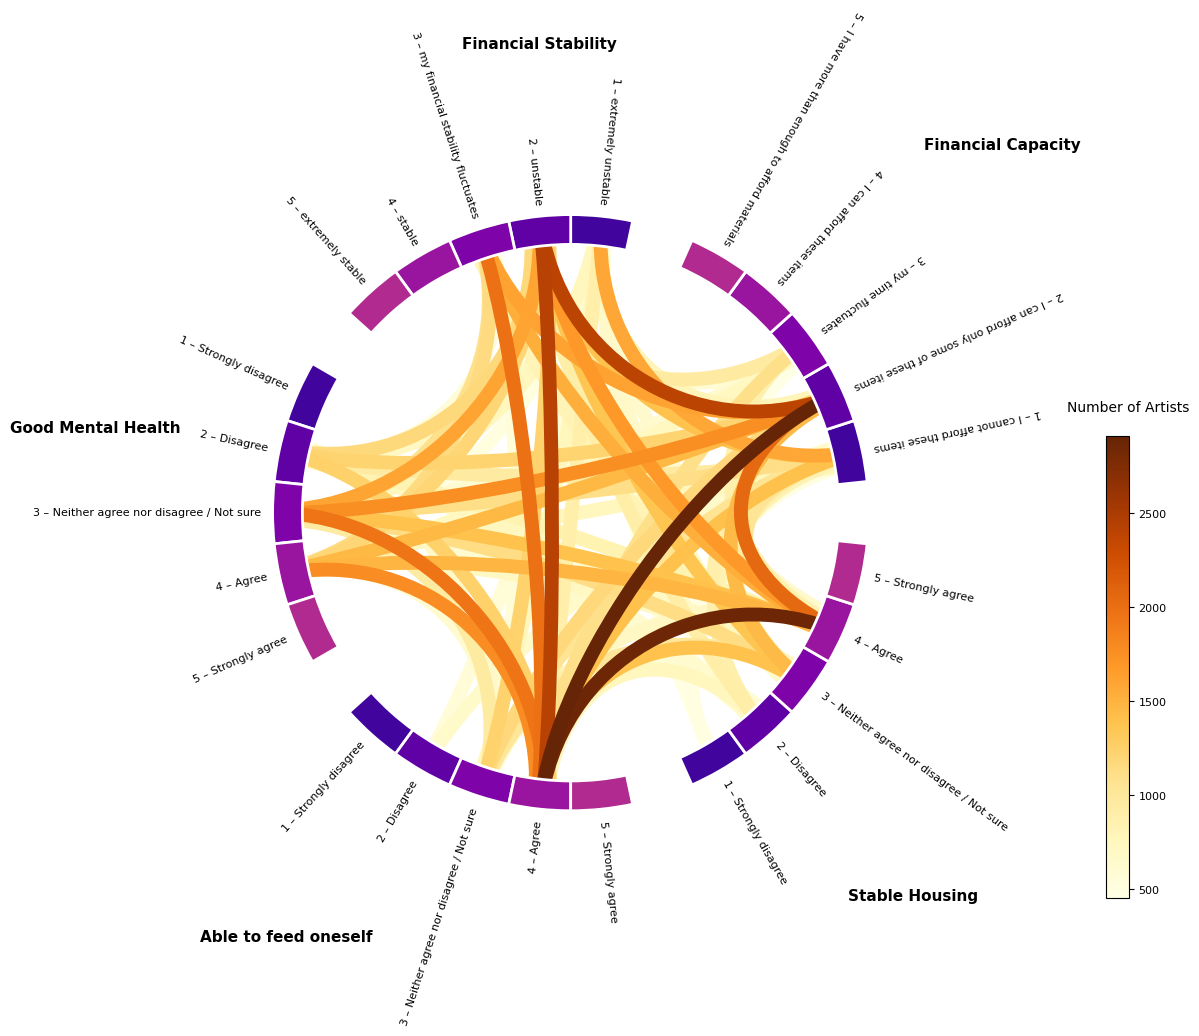

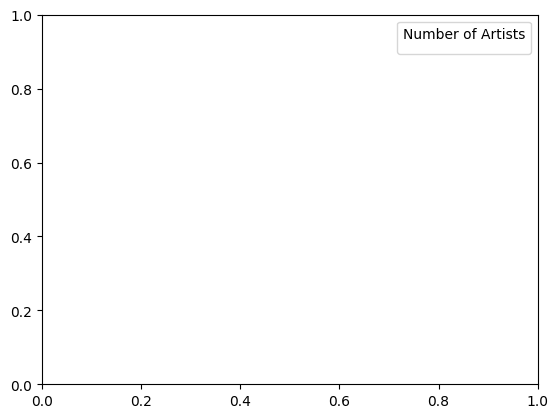

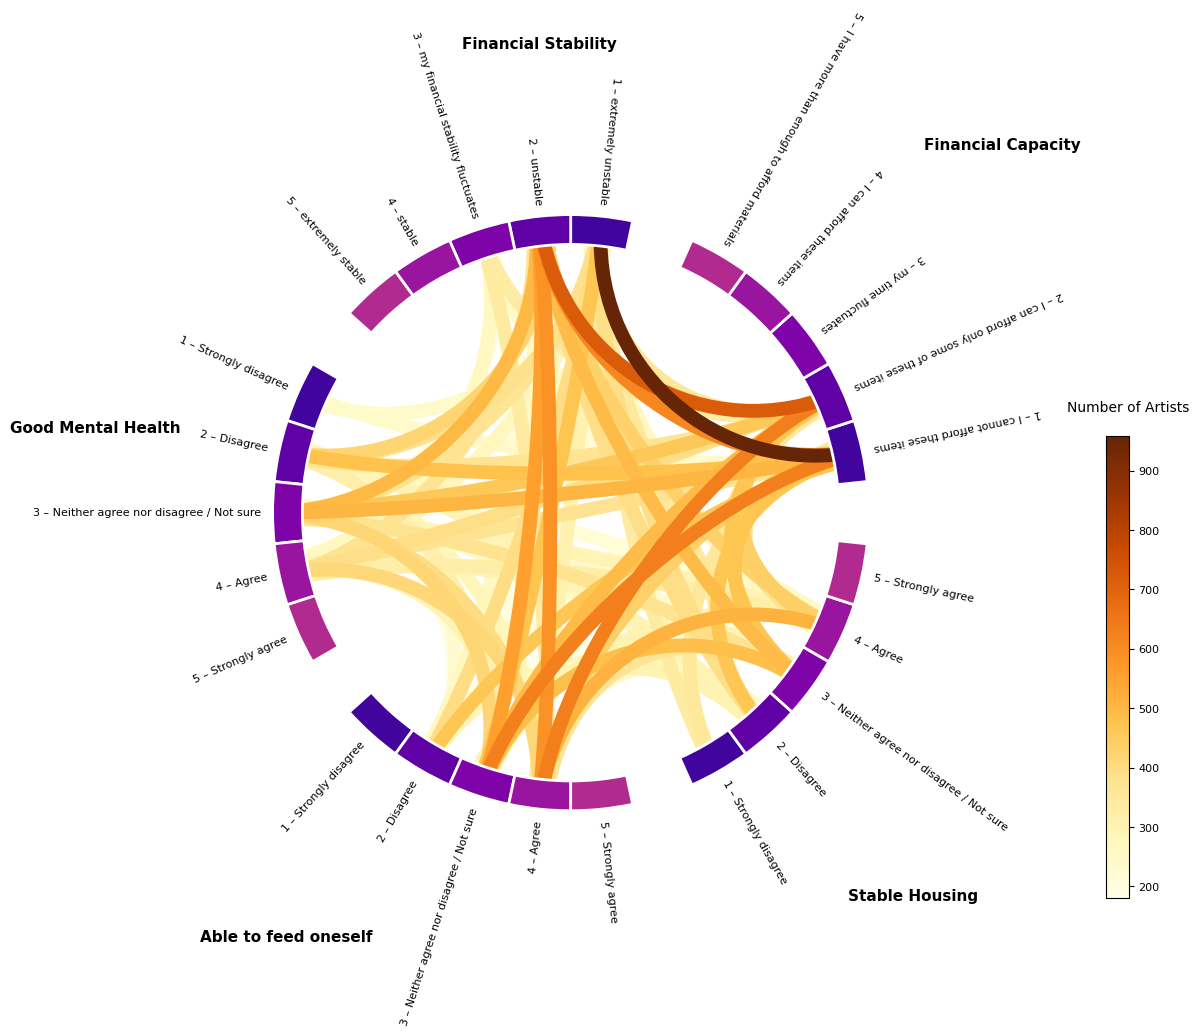

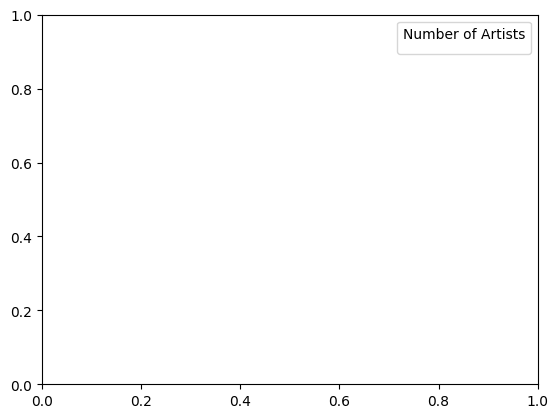

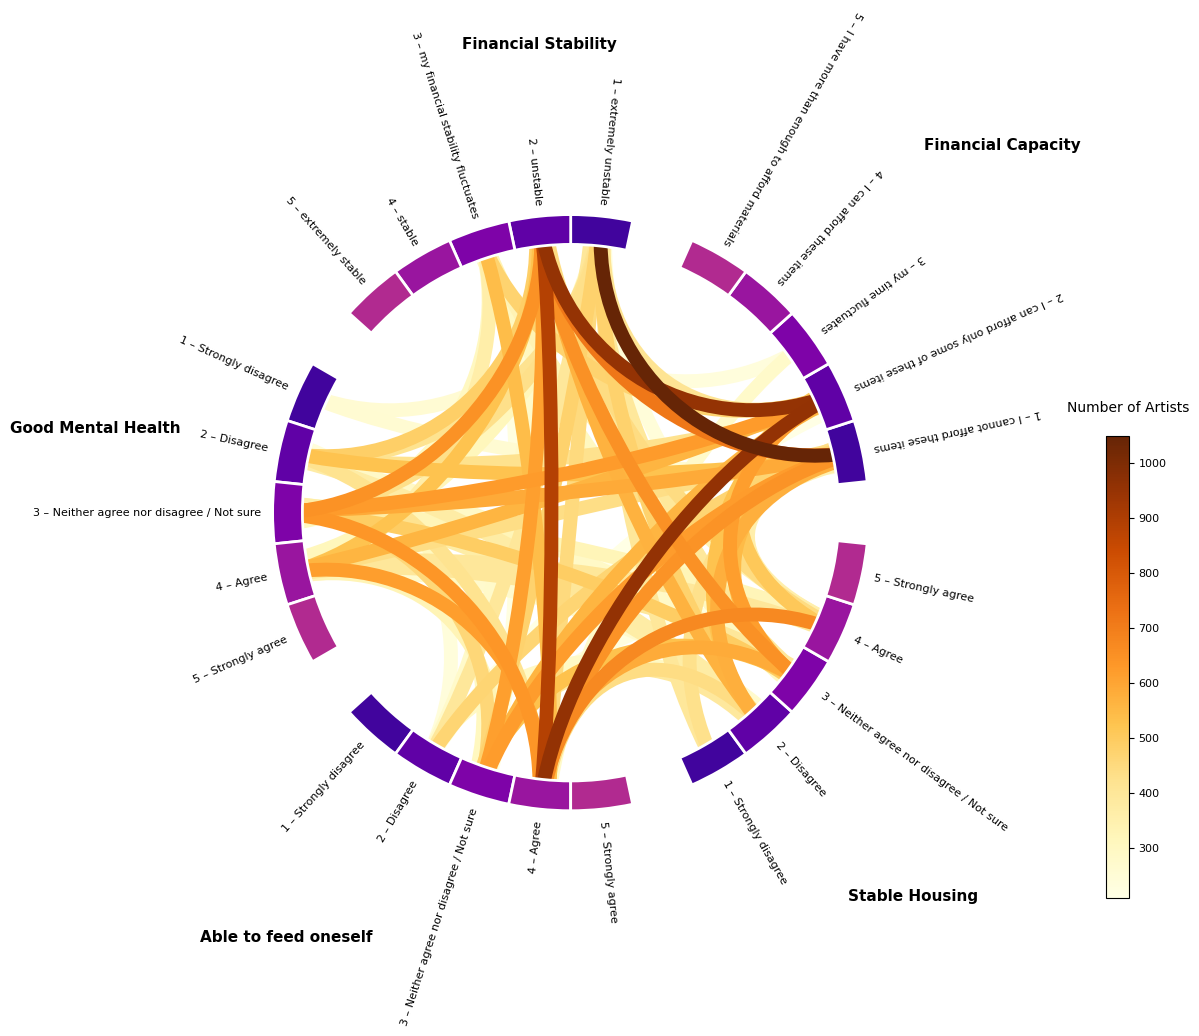

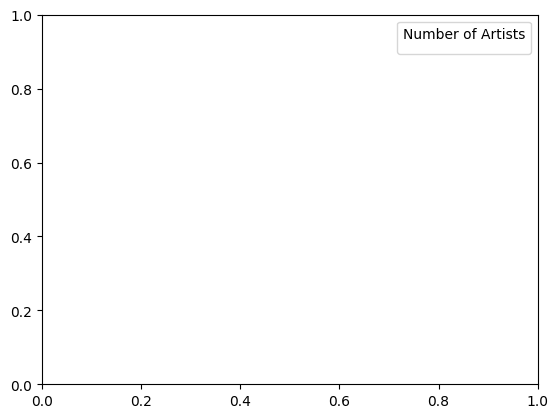

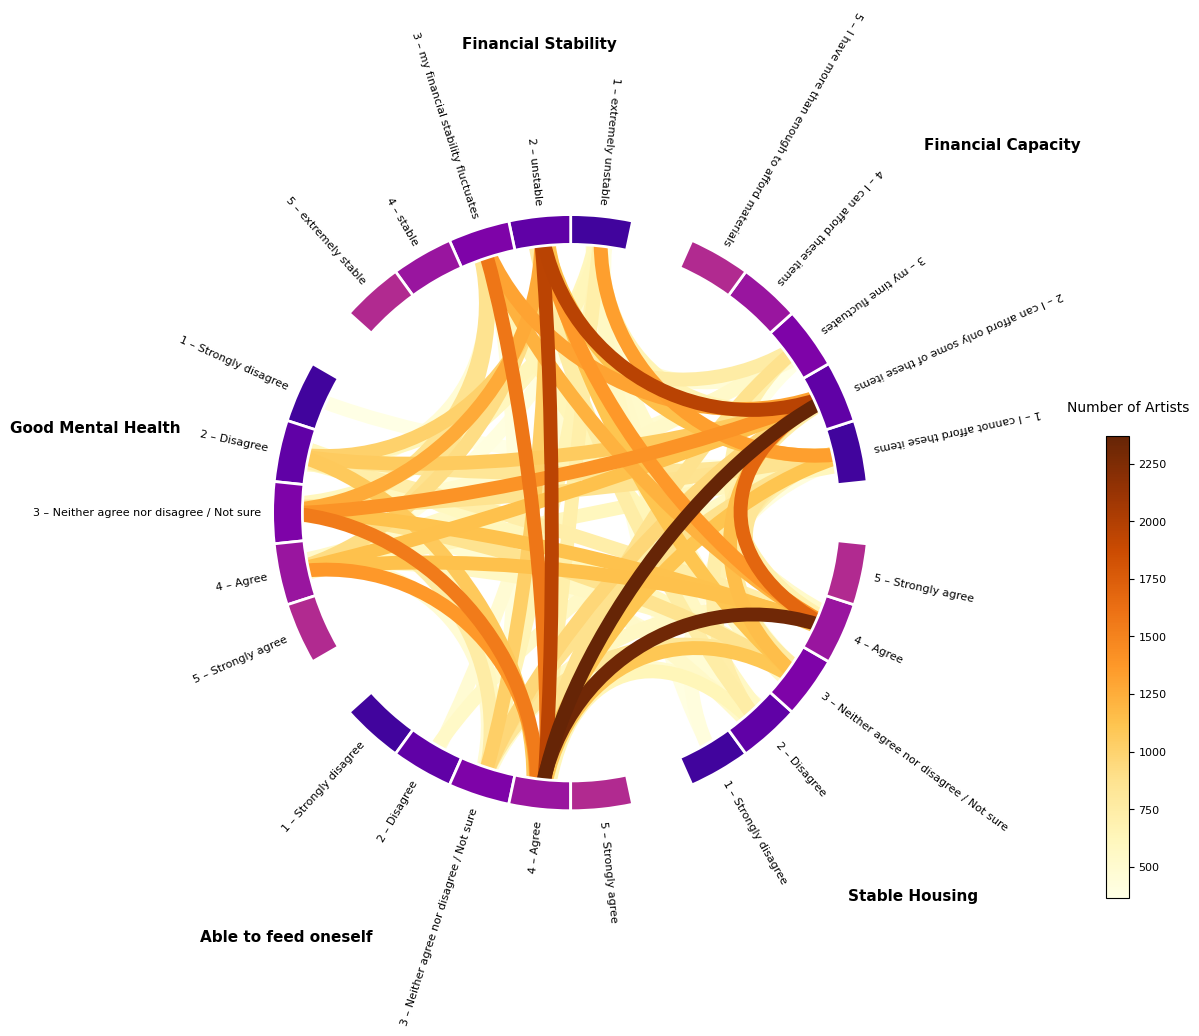

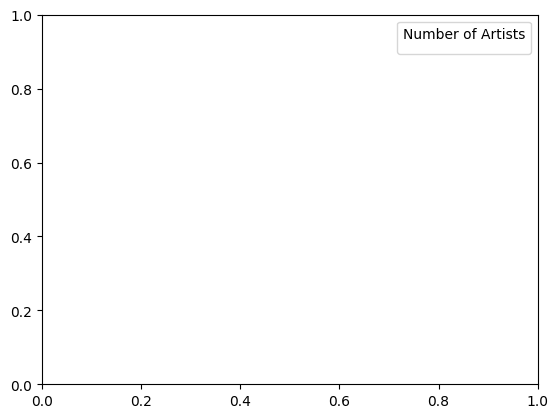

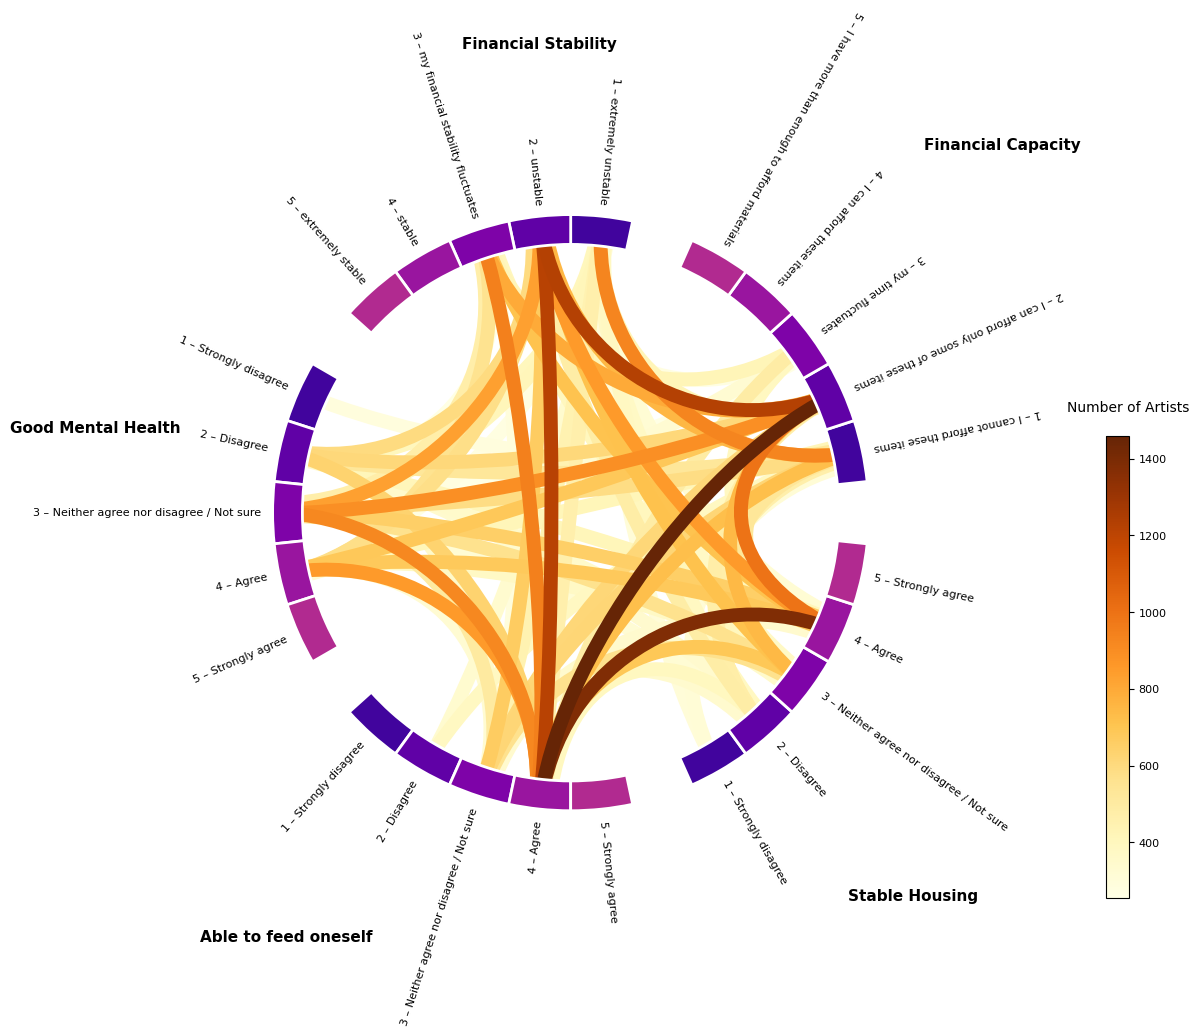

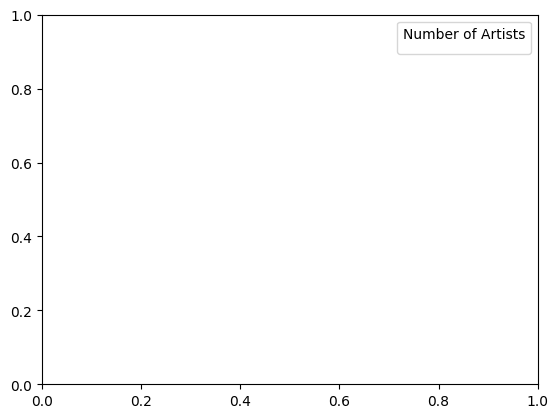

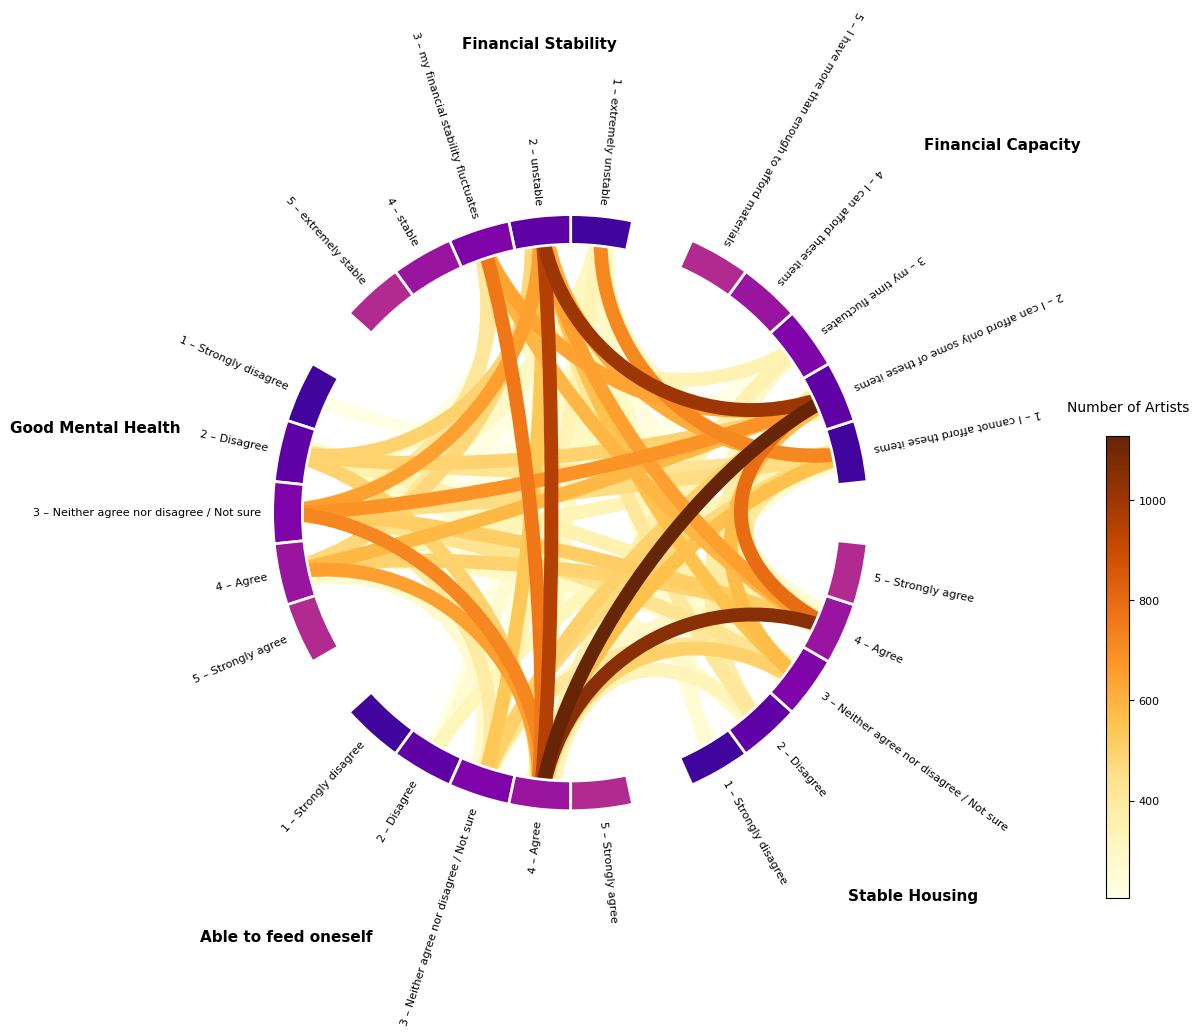

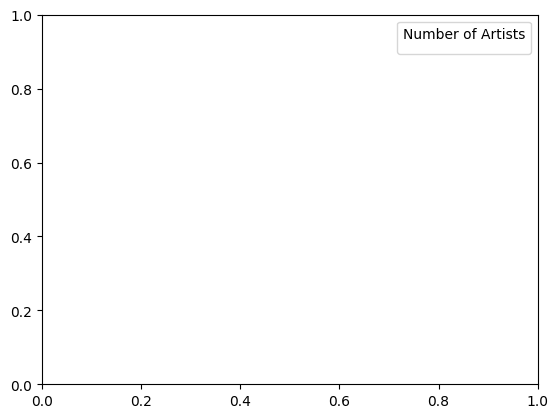

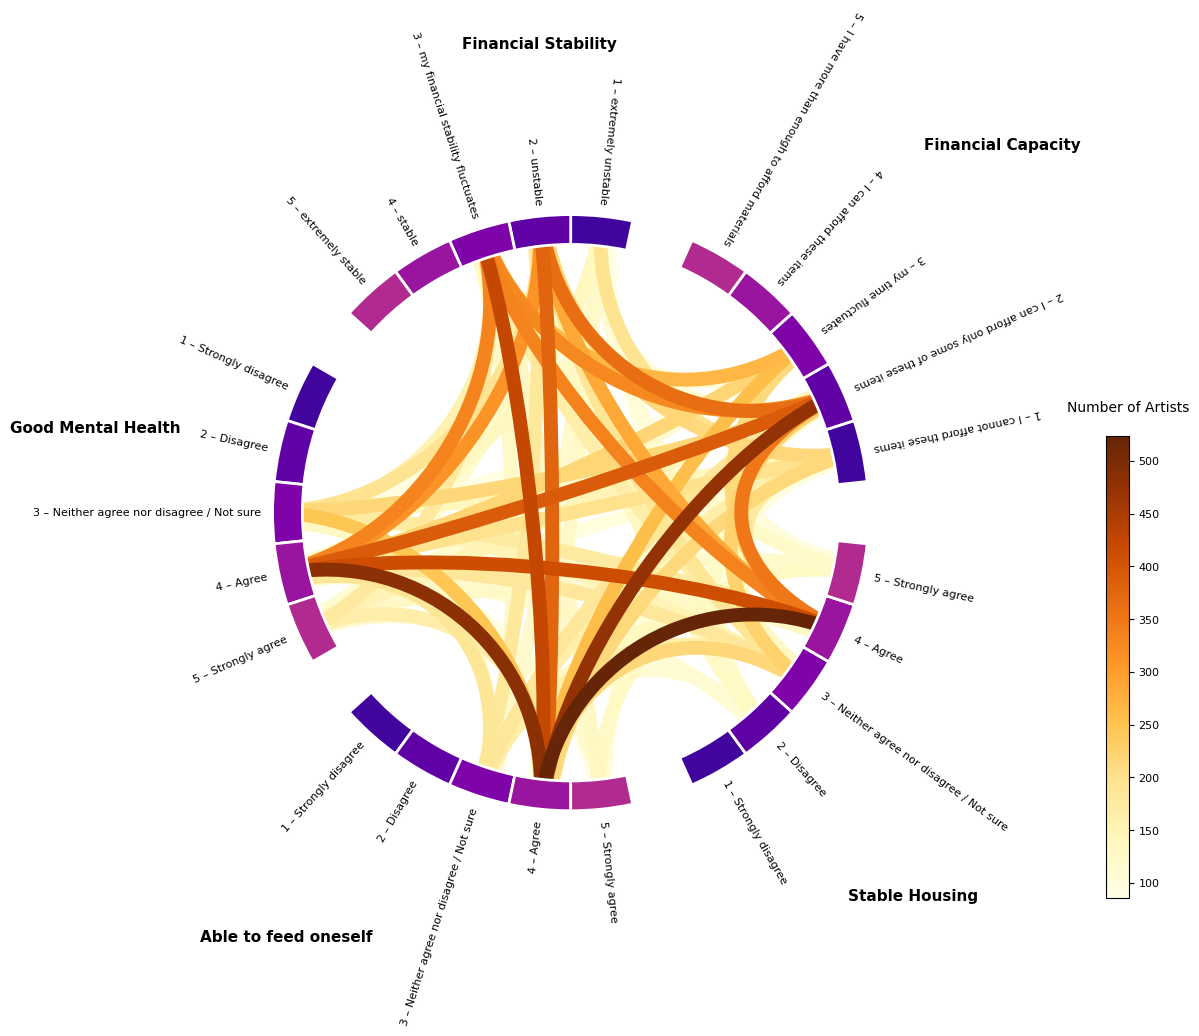

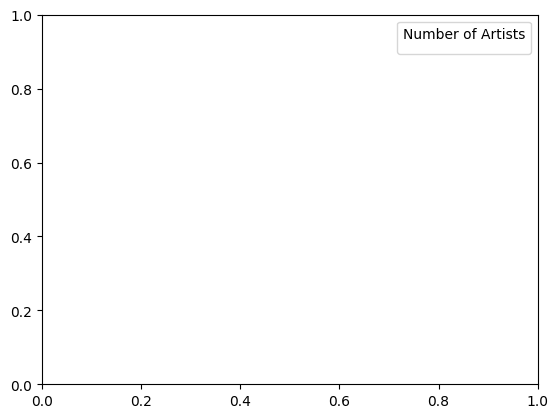

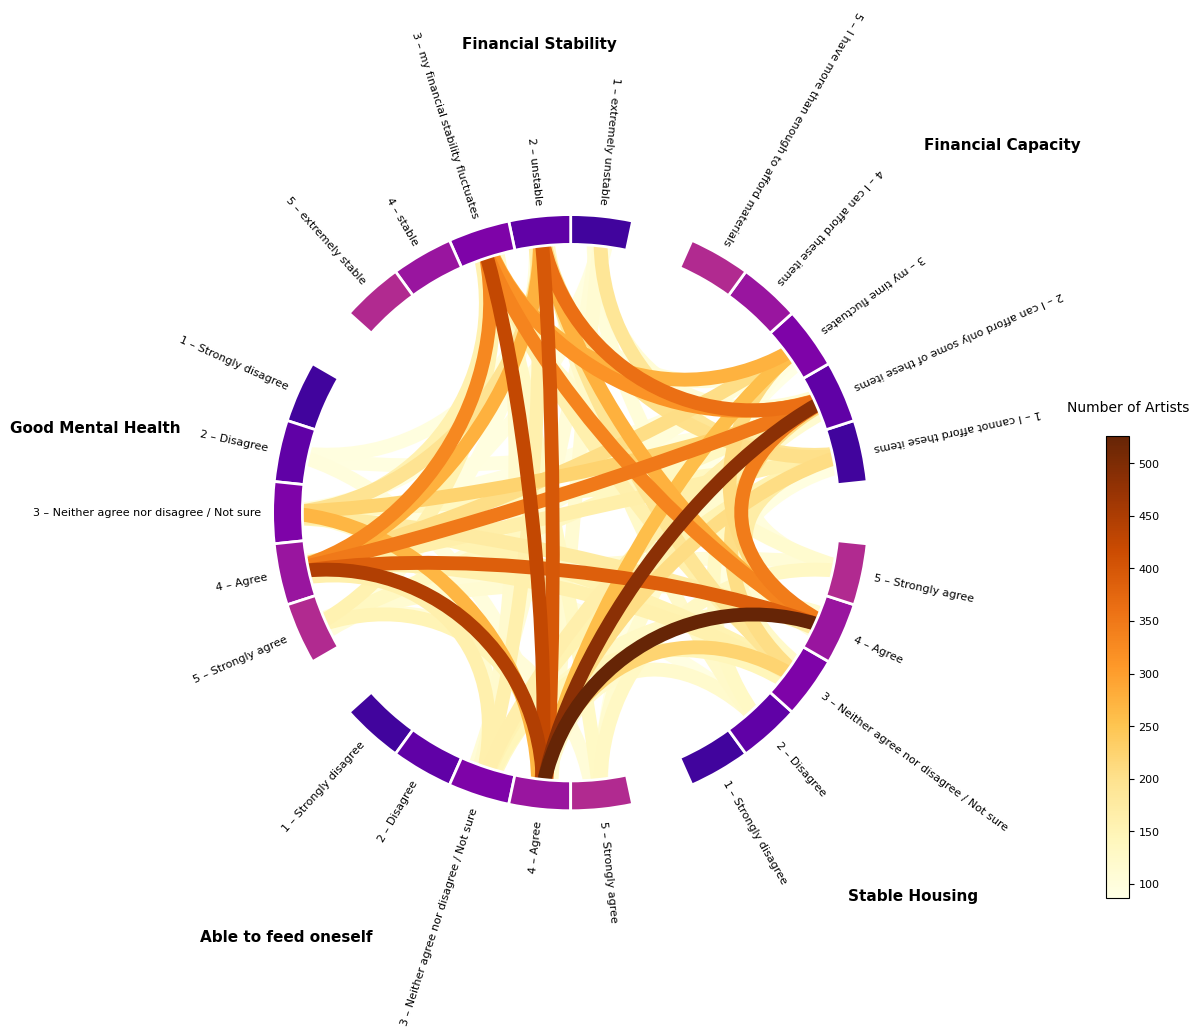

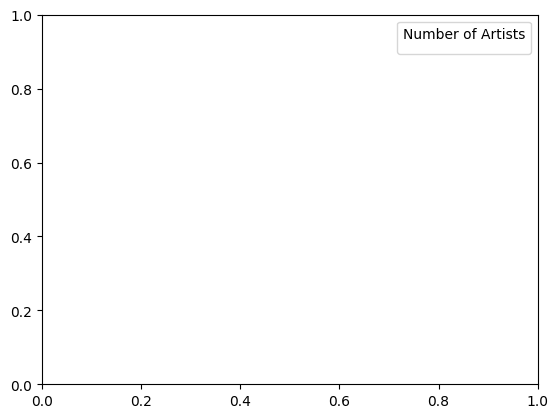

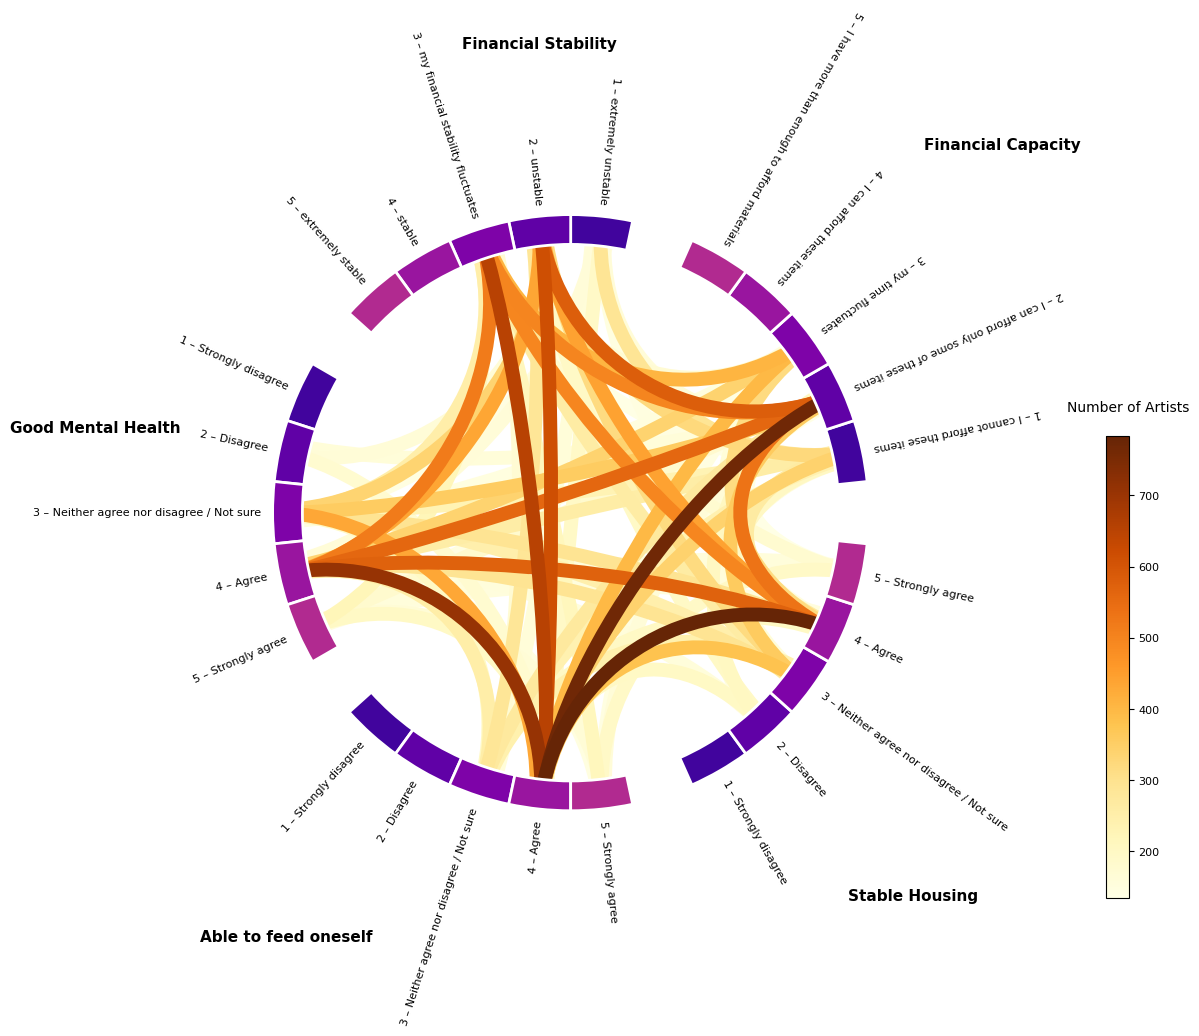

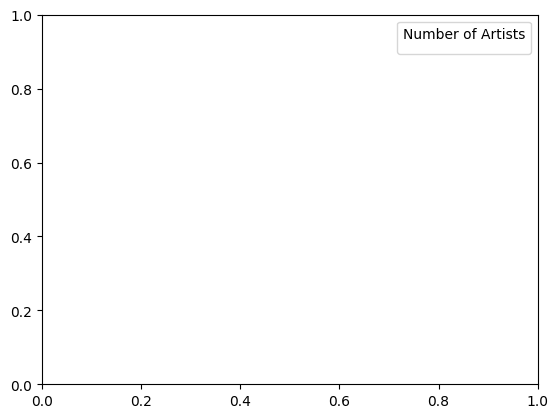

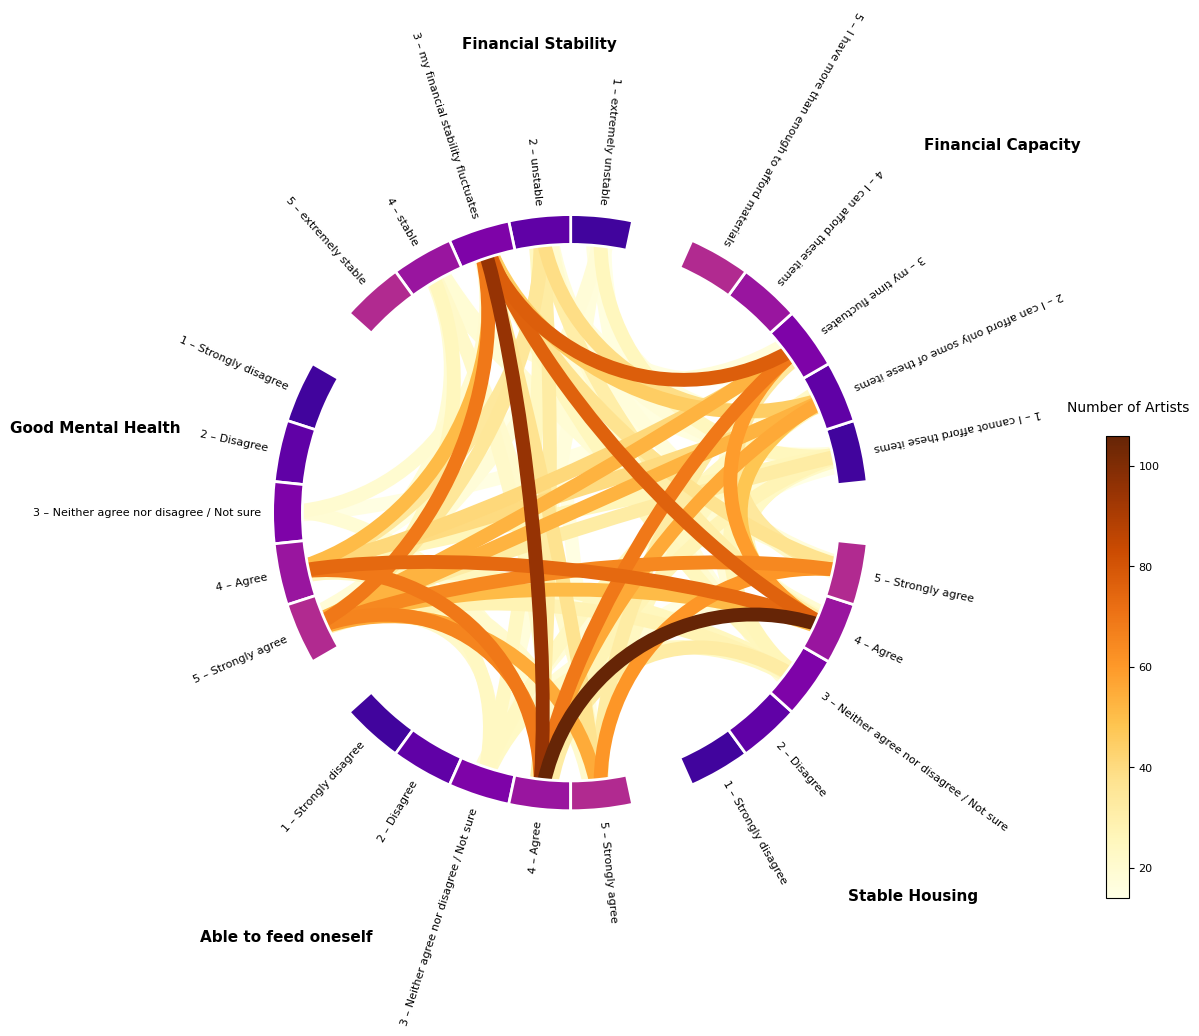

ValueError: node_angles has to be the same length as node_names

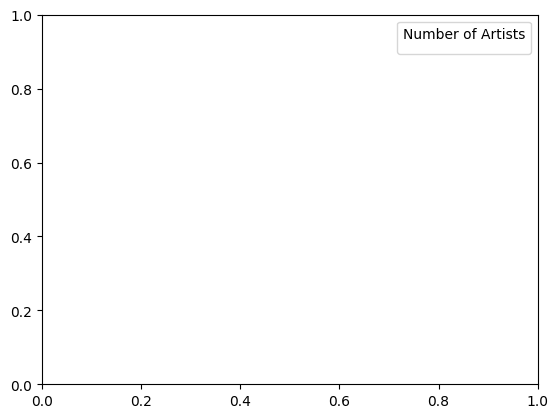

In [64]:
for value in wellbeing_df.wellbeing_impact_2020_2022.unique():
  dff = wellbeing_df[wellbeing_df['wellbeing_impact_2020_2022'] == value]
  psychological_df = dff[["financial_capacity", "financial_stability", "good_mental_health", "feed_myself", "stable_housing"]].dropna()
  #psychological_df = crny_df[["financial_capacity", "financial_stability", "good_mental_health", "feed_myself", "stable_housing"]].dropna()
  columns = ["financial_capacity", "financial_stability", "good_mental_health", "feed_myself", "stable_housing"]
  node_names= []

  for c in columns:
    unique_values = sorted(psychological_df[c].unique())
    for val in unique_values:
      node_names.append(c + ": " + str(val))

  # Initialising 2d array with weight values as 0
  node_values = np.zeros((len(node_names),len(node_names)))

  for i in range (0, len(node_names)):
    for j in range (0, len(node_names)):
      c1 = node_names[i].split(': ')[0] # column 1
      c2 = node_names[j].split(': ')[0] # column 2
      val1 = node_names[i].split(': ')[1] # category of column 1
      val2 = node_names[j].split(': ')[1] # category of column 2
      if(c1 != c2): # Storing values only for categories belonging to different columns
        node_values[i][j] = len(psychological_df[(psychological_df[c1] == val1) & (psychological_df[c2] == val2)])

  updated_node_names = []
  for name in node_names:
    updated_node_names.append(name.split(': ')[1])

  purple_shades = np.array(plt.cm.plasma(np.linspace(0.1, 0.4, 5)))
  all_colors = np.vstack((purple_shades,purple_shades,purple_shades,purple_shades,purple_shades))
  start, end = 12, 60
  angles_set = []
  angles_set.append((np.linspace(start, end, len(node_names)//5)).astype(int)[::+1] %360)
  for i in range(0,4):
    angles_set.append(angles_set[i] + 72)
  node_angle_values = np.concatenate(angles_set)

  node_color_values = all_colors

  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  ax.text(0.2, 17, "Number of Artists", size=10)
  ax.text(0.8, 17, "Financial Capacity", fontweight="bold", size=11)
  ax.text(1.8, 16, "Financial Stability", fontweight="bold", size=11)
  ax.text(3, 19,  "Good Mental Health", fontweight="bold", size=11)
  ax.text(4, 19, "Able to feed oneself", fontweight="bold", size=11)
  ax.text(17.9, 16, "Stable Housing", fontweight="bold", size=11)
  plot_connectivity_circle(
  node_values,
  updated_node_names,
  node_colors = node_color_values,
  node_angles= node_angle_values,
  colormap='YlOrBr',
  facecolor='white',
  textcolor='black',
  colorbar=True,
  interactive=True,
  n_lines=75,
  linewidth=10,
  colorbar_size=0.6,
  colorbar_pos=(2, 0),
  padding=0.4,
  node_edgecolor="white",
  ax=ax)

  legend = plt.legend()

  # Set the title of the legend
  legend.set_title('Number of Artists')

  fig.savefig(value+'.png', bbox_inches='tight',transparent=True)

In [37]:
wellbeing_df.to_csv("wellbeing.csv",index=False)

## LGBTQIA & Gender Distribution UpSet Plot

Preprocessing of the data and creating visualization for UpSet plot.

In [14]:
gender_df = crny_df
gender_df["gender"] = gender_df["gender"].apply(lambda x: [item for item in x if pd.notna(item)])
gender_df["gender"] = gender_df["gender"].apply(lambda x: [item.replace('(please describe)', '').strip() for item in x])
gender_df['lgbtqiap'].str.strip()

unique_genders = set()
for genders in gender_df['gender']:
    unique_genders.update(genders)

gender_lgbt_df = pd.DataFrame(columns=['id','lgbtqiap'] + list(unique_genders))
gender_lgbt_df['id'] = gender_df['id']
gender_lgbt_df['lgbtqiap'] = gender_df['lgbtqiap']

for i, row in gender_df.iterrows():
    for gender in row['gender']:
        gender_lgbt_df.at[i, gender] = True

gender_lgbt_df = gender_lgbt_df.dropna(subset=['lgbtqiap'])
gender_lgbt_df = gender_lgbt_df.fillna(False)

In [15]:
gender_lgbt_df.set_index(['I prefer not to answer', 'Other','Man','Woman','Non-binary','Two-spirit'], inplace=True)

In [ ]:
gender_lgbt_df.to_csv("gender_lgbt.csv",index=False)

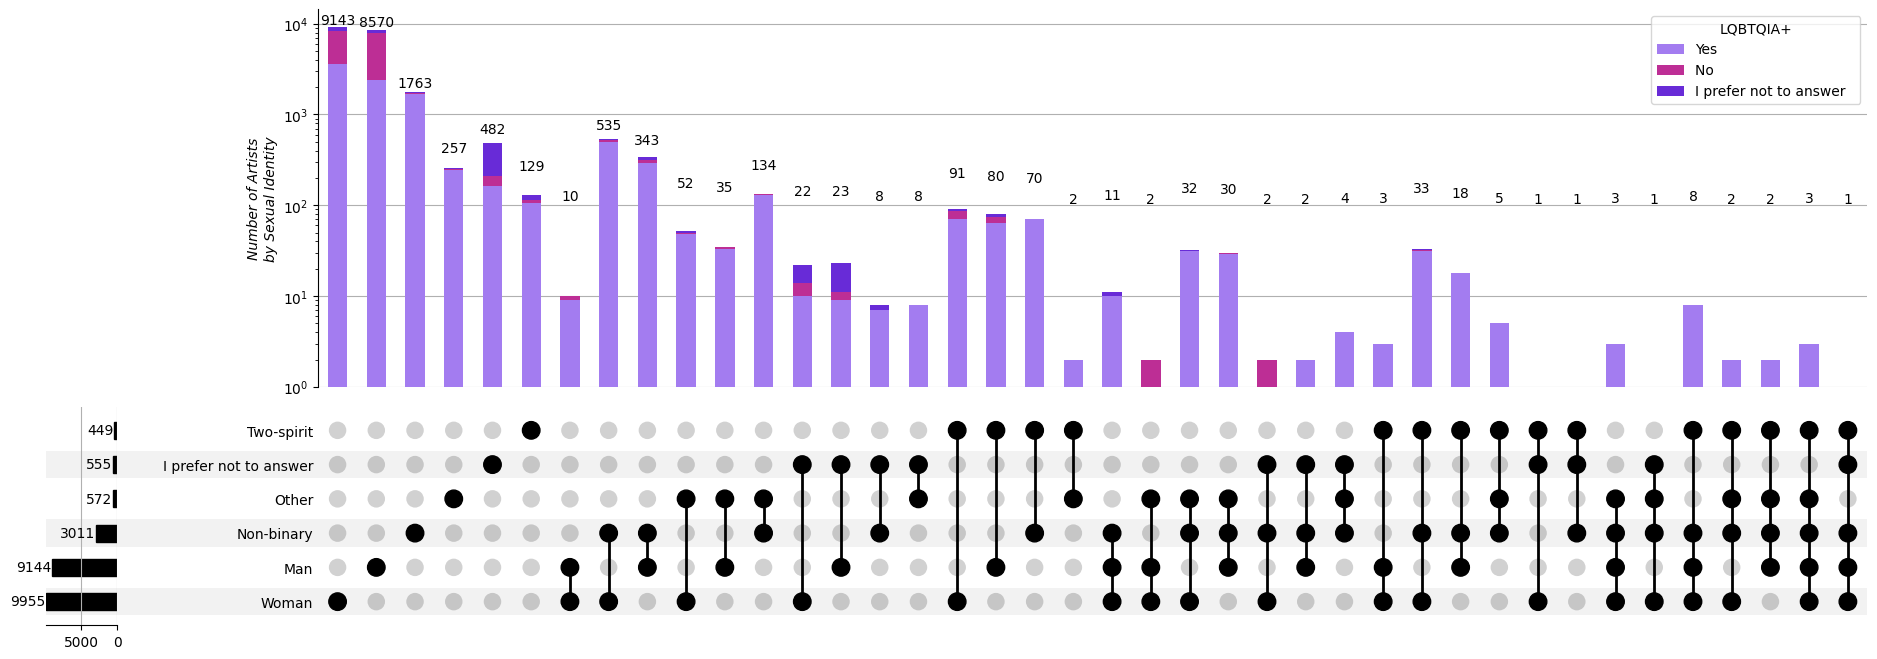

In [26]:
upset = UpSet(gender_lgbt_df, show_counts=True, intersection_plot_elements=0, element_size = 36
              #min_subset_size=4
              )
upset.add_stacked_bars(
    by="lgbtqiap", colors=["#682bd7","#bd2e95","#a37cf0"], title="Count by Sexual Identity", elements=10
)


upset.plot()

#plt.suptitle("Distribution of Gender & Sexual Identity of Artists")
plt.legend(title='LQBTQIA+')
plt.yscale('log')
plt.ylabel("Number of Artists\nby Sexual Identity", fontstyle='italic')
plt.savefig("upset_plot.png", bbox_inches='tight', transparent=True)
plt.show()

## Bar Plot

Preprocessing of the data and creating visualization for bar plot.

In [ ]:
discipline_df = crny_df
discipline_df["discipline"] = discipline_df["discipline"].apply(lambda x: [item for item in x if pd.notna(item)])
discipline_df["discipline"] = discipline_df["discipline"].apply(lambda x: [item.replace('(blank)', '').strip() for item in x])
discipline_df["discipline"] = discipline_df["discipline"].apply(lambda x: [item for item in x if item != ''])
discipline_df["approach"] = discipline_df["approach"].apply(lambda x: [item for item in x if pd.notna(item)])

discipline_approach_df = discipline_df.explode('approach')
discipline_approach_df["approach"] = discipline_approach_df["approach"].str.strip()
discipline_approach_df.dropna(subset=['approach'], inplace= True)
discipline_approach_df['approach'] = discipline_approach_df['approach'].replace({
    "I work as a solo artist.":"Solo Artist",
    "I collaborate regularly with other artists.":"Collaboration with Artists",
    "Performing, presenting, or exhibiting to an audience or viewers is core to my practice.":"Performing/Presenting/Exhibiting",
    "My practice requires public or community involvement to have meaning.":"Public Involvement",
    "Teaching or educating others is core to my practice.":"Teaching",
    "I collaborate regularly with other non-arts practitioners.":"Collaboration with Non-Arts Practioners",
})

discipline_bar_df = discipline_approach_df.explode('discipline')
discipline_bar_df = discipline_bar_df[['discipline','public_value','approach']]
discipline_bar_df.dropna(subset = ['public_value','discipline'], inplace=True)
disciplinecount_df = discipline_bar_df.groupby(['discipline', 'approach', 'public_value']).size().reset_index(name='count')
disciplinecount_df.rename(columns={"public_value":"Public Value of Art"}, inplace=True)

In [ ]:
disciplinecount_df.to_csv("disciplines.csv",index=False)

In [ ]:
fig =  px.bar(
            disciplinecount_df,
            y="approach",
            x="count",
            color="Public Value of Art",
            color_discrete_sequence=["#bd2e95","#a37cf0","#682bd7"],
            animation_frame="discipline",
            hover_name='approach',
            hover_data={'Public Value of Art' : True, 'approach': False, 'discipline': False, 'count': True},
            range_x=[0, 5000]
        )

fig.update_layout(
    yaxis_title="Approach of Art Practice",
    xaxis_title="Number of Artists",
    title_text="Discipline and Approach of Artists",
    title_x=0.5,
    title_font_size=24,
    width=800,
    height=600,
    plot_bgcolor='rgba(0,0,0,0)',
    #yaxis=dict(tickangle=-90),
    xaxis=dict(showline=True, linecolor='black', showgrid=True, gridcolor='gray',griddash='dash'),
    updatemenus=[
        {
            "direction": "left",
            "pad": {"l": 20, "t": 40},
            "showactive": False,
            #"type": "buttons",
            "x": -1,
            "xanchor": "left",
            "y": -0.1,
            "yanchor": "top",
        }
    ],
    sliders=[
        {
            "active": 0,
            "yanchor": "top",
            "xanchor": "left",
            "currentvalue": {
                "font": {"size": 16},
                "prefix": "Discipline: ",
                "visible": True,
                "xanchor": "right"
            },
            "pad": {"b": 10, "t": 50},
            "len": 2.5,
            "x": -1,
            "y": -0.1
        }
    ]
)

fig.show()


## Pie Chart

Preprocessing of the data and creating visualization for pie chart.

In [ ]:
causes_df = crny_df
causes_df["causes_participation"] = causes_df["causes_participation"].apply(lambda x: [item for item in x if pd.notna(item)])
causes_exploded_df = causes_df.explode('causes_participation')
causes_exploded_df.dropna(subset=['causes_participation'], inplace= True)
causes_exploded_df['causes_participation'] = causes_exploded_df['causes_participation'].replace({
    "artsculture":"Arts or Culture",
    "economicjustice":"Economic Justice",
    "environmentclimatejustice":"Environment Justice",
    "housingtenantsrights":"Housing Rights",
    "laborworkersrights":"Labor Rights ",
    "socialandracialjustice":"Social & Racial Justice",
    "disabilityjustice":"Disability Justice",
    "childcareaccess":"Childcare access",
    "othercause":"Other",
    "noneatthistime":"None",
})

causes_pie_df = causes_exploded_df[['policy_group','causes_participation']]
causes_pie_df = causes_pie_df.groupby(['causes_participation', 'policy_group']).size().reset_index(name='count')

In [ ]:
causes_pie_df.to_csv("causes.csv",index=False)

In [ ]:
app = Dash(__name__)

app.layout = html.Div(
    [
        html.H4("Causes participated by Artists"),
        dcc.Loading(dcc.Graph(id="graph"), type="circle"),
         html.P("Member of Group that can influence public policy on government:"),
        dcc.RadioItems(
            id="data",
            options=["Yes", "No"],
            value="Yes",
        ),
    ]
)


@app.callback(
    Output("graph", "figure"),
    Input("data", "value")
)
def generate_chart(data):
    if data == 'Yes':
      pie_df = causes_pie_df[causes_pie_df['policy_group'] == 'Yes']
    else:
      pie_df = causes_pie_df[causes_pie_df['policy_group'] == 'No']
    fig = px.pie(pie_df,
                 values='count',
                 names='causes_participation',
                 hover_name='causes_participation',
                 hover_data={'causes_participation' : False, 'policy_group': False, 'count': False},
                 color_discrete_sequence=px.colors.sequential.Agsunset,
                 width=600,
                 height=400)
    return fig


if __name__ == "__main__":
    app.run_server(debug=True)

<ipython-input-27-b292d3be9a33>:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<IPython.core.display.Javascript object>

## Violin Plot

Preprocessing of the data and creating visualization for violin chart.

In [66]:
def assign_income(row):
    if row['household_income_2021'] == 'Under $15,000':
        return np.random.randint(0, 14999)
    elif row['household_income_2021'] == '$15,000 to $24,999':
        return np.random.randint(15000, 24999)
    elif row['household_income_2021'] == '$25,000 to $34,999':
        return np.random.randint(24999, 34999)
    elif row['household_income_2021'] == '$35,000 to $49,999':
        return np.random.randint(35000, 49999)
    elif row['household_income_2021'] == '$50,000 to $74,999':
        return np.random.randint(50000, 74999)
    elif row['household_income_2021'] == '$75,000 to $99,999':
        return np.random.randint(75000, 99999)
    elif row['household_income_2021'] == '$100,000 to $149,999':
        return np.random.randint(100000, 149999)
    elif row['household_income_2021'] == 'Over $150,000':
        return np.random.randint(150000, 225000)
    else:
        return np.nan

In [40]:
job_df = crny_df
job_df['earning_mode'] = job_df["earning_mode"].apply(lambda x: [item for item in x if pd.notna(item)])
job_exploded_df = job_df.explode('earning_mode')
job_exploded_df.dropna(subset=['earning_mode'], inplace= True)
job_exploded_df['earning_mode'] = job_exploded_df['earning_mode'].replace({
    "artpractice":"Art Practice",
    "gigs_contracts_temp":"Contracts or Temporary Jobs",
    "unemployed":"Unemployed",
    "parttimejob":"One or More Part-time Jobs",
    "other_earn":"Other",
    "fulltimejob":"Fulltime Job",
    "familypartnersupport":"Family Support"
})

job_violin_df = job_exploded_df[['earning_mode','household_income_2021','debt']]
job_violin_df['income'] = job_violin_df.apply(assign_income, axis=1)
job_violin_df.dropna(inplace=True)

<ipython-input-40-ebb5463ee4f1>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-ebb5463ee4f1>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
job_violin_df.to_csv("job.csv",index=False)

NameError: name 'job_violin_df' is not defined

In [74]:
age_income_df = crny_df[['household_income_2021','age','finance_400_emergency','financial_stability','financial_capacity']]

age_income_df['financial_stability'] = age_income_df['financial_stability'].replace({
    "1 – extremely unstable":"Extremely unstable",
    "2 – unstable":"Unstable",
    "3 – my financial stability fluctuates":"Fluctuating",
    "4 – stable":"Stable",
    "5 – extremely stable":"Extremely stable",
    "I collaborate regularly with other non-arts practitioners.":"Collaboration with Non-Arts Practioners",
})



age_income_df['income'] = age_income_df.apply(assign_income, axis=1)
age_income_df.dropna(inplace=True)

age_income_df = age_income_df[(age_income_df['age'] >= 18) & (age_income_df['age'] <= 100)]
age_income_df.to_csv("age_income.csv",index=False)

<ipython-input-74-e0335dffc980>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-e0335dffc980>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-74-e0335dffc980>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
age_income_df['finance_400_emergency'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
age_income_df

household_income_2021   age finance_400_emergency financial_stability  \
1             Under $15,000  28.0                    No  Extremely unstable   
7             Under $15,000  66.0                    No  Extremely unstable   
8        $25,000 to $34,999  35.0                    No            Unstable   
10            Under $15,000  30.0                    No            Unstable   
11       $35,000 to $49,999  62.0                   Yes            Unstable   
...                     ...   ...                   ...                 ...   
23791         Under $15,000  24.0                    No  Extremely unstable   
23792    $35,000 to $49,999  47.0                   Yes         Fluctuating   
23793    $15,000 to $24,999  36.0                    No            Unstable   
23794    $15,000 to $24,999  32.0                    No  Extremely unstable   
23796    $25,000 to $34,999  36.0                    No         Fluctuating   

       financial_capacity   income  
1                       2    749.0  
7                       3   4399.0  
8                       2  32283.0  
10                      2   2530.0  
11                      2  46614.0  
...                   ...      ...  
23791                   1   4732.0  
23792                   3  37399.0  
23793                   1  23339.0  
23794                   1  21409.0  
23796                   2  32557.0  

[11844 rows x 6 columns]

In [43]:
from matplotlib import colors
fig = go.Figure()


fig.add_trace(go.Violin(x=job_violin_df['earning_mode'][job_violin_df['debt'] == 'Yes'],
                            y=job_violin_df['income'][job_violin_df['debt'] == 'Yes'],
                            name='Yes',
                            box_visible=True,
                            legendgroup='Yes',
                            scalegroup='Yes',
                            side='negative',
                            line_color=[colors.to_hex(plt.cm.get_cmap('plasma')(i)) for i in np.linspace(0.1, 0.8, len(job_violin_df['debt'].unique()))][0],
                            jitter=0.2,
                            opacity=0.6,
                            hoverinfo='x+name', hoverinfosrc=None, hoverlabel=None, hoveron=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None))
fig.add_trace(go.Violin(x=job_violin_df['earning_mode'][job_violin_df['debt'] == 'No'],
                            y=job_violin_df['income'][job_violin_df['debt'] == 'No'],
                            name='No',
                            box_visible=True,
                            legendgroup='No',
                            scalegroup='No',
                            side='positive',
                            line_color=[colors.to_hex(plt.cm.get_cmap('plasma')(i)) for i in np.linspace(0.1, 0.8, len(job_violin_df['debt'].unique()))][-1],
                            jitter=0.2,
                            opacity=0.6,
                            hoverinfo='x+name', hoverinfosrc=None, hoverlabel=None, hoveron=None, hovertemplate=None, hovertemplatesrc=None, hovertext=None, hovertextsrc=None))
fig.update_layout(
    title_text="Employment Type & Income range",
    legend=dict(
        title='Currently in Debt'
    ),
    xaxis_title="Mode of Earning",
    yaxis_title="Household Income",
    violingap=0.2,
    violingroupgap=0.1,
    violinmode='overlay',
    width=800,
    height=800,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor= 'rgba(0, 0, 0, 0)',
    xaxis=dict(tickangle=-90),
    yaxis=dict(showline=True, linecolor='black', showgrid=True, gridcolor='gray',griddash='dash')
)
fig.show()

<ipython-input-43-dc2466d2907c>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-43-dc2466d2907c>:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



## Theme Colors

In [3]:
import matplotlib as plt
from matplotlib import colors
import numpy as np
[colors.to_hex(plt.cm.get_cmap('plasma')(i)) for i in np.linspace(0.2, 0.8, 8)]

<ipython-input-3-6fa1619280ec>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  [colors.to_hex(plt.cm.get_cmap('plasma')(i)) for i in np.linspace(0.2, 0.8, 8)]


['#6a00a8',
 '#8b0aa5',
 '#a82296',
 '#c13b82',
 '#d5536f',
 '#e66c5c',
 '#f48849',
 '#fca636']